In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm
import calendar
from datetime import datetime,date
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
import optuna
from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle
sys.version_info

# Feature Selection
from sklearn.feature_selection import chi2, f_classif, f_regression
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile, VarianceThreshold

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [6]:
import numpy as np
import pandas as pd
import random
import os
SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

set_seed(SEED)

random_state = SEED

In [9]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
var = pd.read_csv('VariableDescription.csv')

test_id = test['ID']

train.shape, test.shape

((3870, 44), (1290, 43))

In [10]:
var.head(10)

Variable                            Description
0                    District                   Name of the district
1                       Block                      Name of the block
2                    CultLand          Area of total cultivated land
3                CropCultLand         Area of land under cultivation
4       LandPreparationMethod            Method for land preparation
5             CropTillageDate    Date of tillage of the largest plot
6            CropTillageDepth                   Depth of the tillage
7               CropEstMethod              Method of transplantation
8               RcNursEstDate          Date of nursery establishment
9  SeedingSowingTransplanting  Date of sowing/Transplanting the crop

In [11]:
# Preview train
train.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            NaN      NaN         NaN                        NaN   
1            NaN      NaN         NaN                        NaN   
2    Ganaura FYM      1.0         1.0                SoilApplied   
3        Ganaura      1.0         NaN                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  2           Urea       NaN       20.0         Broadcasting   
1                  2       DAP Urea      15.0       10.0         Broadcasting   
2                  2            DAP       4.0        NaN          SoilApplied   
3                  2       DAP Urea       6.0        3.0         Broadcasting   
4                  2       Urea DAP      15.0       30.0         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea     15.0          18.0      NaN           NaN   
1              U

In [12]:
# Preview test
test.head()

ID  District   Block  CultLand  CropCultLand  \
0  ID_F9XXEXN2ADR2     Jamui  Khaira        20            13   
1  ID_SO3VW2X4QO93     Jamui  Khaira        25            25   
2  ID_UKUQ7JM8E894   Nalanda  Rajgir        30            30   
3  ID_QUISMWEZR2H4  Vaishali   Mahua        15            10   
4  ID_25JGI455VKCZ   Nalanda  Rajgir        30            10   

                               LandPreparationMethod CropTillageDate  \
0                                      TractorPlough      2022-07-24   
1                                      TractorPlough      2022-07-24   
2  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-07   
3  WetTillagePuddling TractorPlough BullockPlough...      2022-07-04   
4  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-21   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 4    Manual_PuddledLine    2022-07-03   
1                 5  Manual_PuddledRandom    2022-07-08   
2                 5  Manual_PuddledRandom    2022-06-24   
3                 5  Manual_PuddledRandom    2022-06-20   
4                 3  Manual_PuddledRandom    2022-06-24   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-29              1.0   
1                 2022-08-02              4.0   
2                 2022-07-08              2.0   
3                 2022-07-10              2.0   
4                 2022-07-22              1.0   

                                       NursDetFactor  \
0  LabourAvailability IrrigWaterAvailability PreM...   
1  CalendarDate SeedAvailability IrrigWaterAvaila...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4            SeedAvailability IrrigWaterAvailability   

                                      TransDetFactor  \
0  IrrigWaterAvailability LaborAvailability RainA...   
1  CalendarDate SeedlingAge IrrigWaterAvailabilit...   
2  SeedlingAge RainArrival IrrigWaterAvailability...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge IrrigWaterAvailability LaborAvaila...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           2.0                        Boring   
1                           2.0                         Canal   
2                           4.0                         Canal   
3                           2.0                        Boring   
4                           6.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                             Diesel          200.0            2.0   
1                                NaN            NaN            3.0   
2                                NaN            NaN           10.0   
3                             Diesel            NaN            NaN   
4                           Electric          400.0            NaN   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            FYM      NaN         2.0                SoilApplied   
1            NaN      NaN         NaN                        NaN   
2        Ganaura      2.0         NaN               Broadcasting   
3            FYM      NaN         5.0                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  3            DAP       6.0        NaN         Broadcasting   
1                  3            DAP       5.0        NaN         Broadcasting   
2                  2       DAP Urea       9.0       18.0         Broadcasting   
3                  2            DAP      15.0        NaN          SoilApplied   
4                  2       DAP Urea      20.0       15.0         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea      8.0          23.0      6.0          63.0   
1              Urea      7.0

In [13]:
list(train.columns)

['ID',
 'District',
 'Block',
 'CultLand',
 'CropCultLand',
 'LandPreparationMethod',
 'CropTillageDate',
 'CropTillageDepth',
 'CropEstMethod',
 'RcNursEstDate',
 'SeedingSowingTransplanting',
 'SeedlingsPerPit',
 'NursDetFactor',
 'TransDetFactor',
 'TransplantingIrrigationHours',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'TransIrriCost',
 'StandingWater',
 'OrgFertilizers',
 'Ganaura',
 'CropOrgFYM',
 'PCropSolidOrgFertAppMethod',
 'NoFertilizerAppln',
 'CropbasalFerts',
 'BasalDAP',
 'BasalUrea',
 'MineralFertAppMethod',
 'FirstTopDressFert',
 '1tdUrea',
 '1appDaysUrea',
 '2tdUrea',
 '2appDaysUrea',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Harv_date',
 'Harv_hand_rent',
 'Threshing_date',
 'Threshing_method',
 'Residue_length',
 'Residue_perc',
 'Stubble_use',
 'Acre',
 'Yield']

In [14]:
train['District'].value_counts()

Nalanda     1193
Jamui       1127
Vaishali     980
Gaya         570
Name: District, dtype: int64

# Get rid of any column containing at least 30% of null values:

In [15]:
percent_missing = train.isnull().sum() * 100/ len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                  'percent_missing': percent_missing})
columns_to_drop = list(percent_missing[percent_missing >= 50].index)
missing_value_train

column_name  \
ID                                                                  ID   
District                                                      District   
Block                                                            Block   
CultLand                                                      CultLand   
CropCultLand                                              CropCultLand   
LandPreparationMethod                            LandPreparationMethod   
CropTillageDate                                        CropTillageDate   
CropTillageDepth                                      CropTillageDepth   
CropEstMethod                                            CropEstMethod   
RcNursEstDate                                            RcNursEstDate   
SeedingSowingTransplanting                  SeedingSowingTransplanting   
SeedlingsPerPit                                        SeedlingsPerPit   
NursDetFactor                                            NursDetFactor   
TransDetFactor                                          TransDetFactor   
TransplantingIrrigationHours              TransplantingIrrigationHours   
TransplantingIrrigationSource            TransplantingIrrigationSource   
TransplantingIrrigationPowerSource  TransplantingIrrigationPowerSource   
TransIrriCost                                            TransIrriCost   
StandingWater                                            StandingWater   
OrgFertilizers                                          OrgFertilizers   
Ganaura                                                        Ganaura   
CropOrgFYM                                                  CropOrgFYM   
PCropSolidOrgFertAppMethod                  PCropSolidOrgFertAppMethod   
NoFertilizerAppln                                    NoFertilizerAppln   
CropbasalFerts                                          CropbasalFerts   
BasalDAP                                                      BasalDAP   
BasalUrea                                                    BasalUrea   
MineralFertAppMethod                              MineralFertAppMethod   
FirstTopDressFert                                    FirstTopDressFert   
1tdUrea                                                        1tdUrea   
1appDaysUrea                                              1appDaysUrea   
2tdUrea                                                        2tdUrea   
2appDaysUrea                                              2appDaysUrea   
MineralFertAppMethod.1                          MineralFertAppMethod.1   
Harv_method                                                Harv_method   
Harv_date                                                    Harv_date   
Harv_hand_rent                                          Harv_hand_rent   
Threshing_date                                          Threshing_date   
Threshing_method                                      Threshing_method   
Residue_length                                          Residue_length   
Residue_perc                                              Residue_perc   
Stubble_use                                                Stubble_use   
Acre                                                              Acre   
Yield                                                            Yield   

                                    percent_missing  
ID                                         0.000000  
District                                   0.000000  
Block                                      0.000000  
CultLand                                   0.000000  
CropCultLand                               0.000000  
LandPreparationMethod                      0.000000  
CropTillageDate                            0.000000  
CropTillageDepth                           0.000000  
CropEstMethod                              0.000000  
RcNursEstDate                              2.144703  
SeedingSowingTransplanting                 0.000000  
SeedlingsPerPit                            7.467700  
NursDetFactor             

In [16]:
train = train.drop(columns = columns_to_drop)
test = test.drop(columns = columns_to_drop)

print(train.shape, test.shape)

(3870, 40) (1290, 39)


In [17]:
print(f'We have {train.shape[0]} rows and {train.shape[1]} columns in the train dataset')
print(f'We have {test.shape[0]} rows and {test.shape[1]} columns in the test dataset')

We have 3870 rows and 40 columns in the train dataset
We have 1290 rows and 39 columns in the test dataset


# **Remove Outliers from target variable "Yield":**

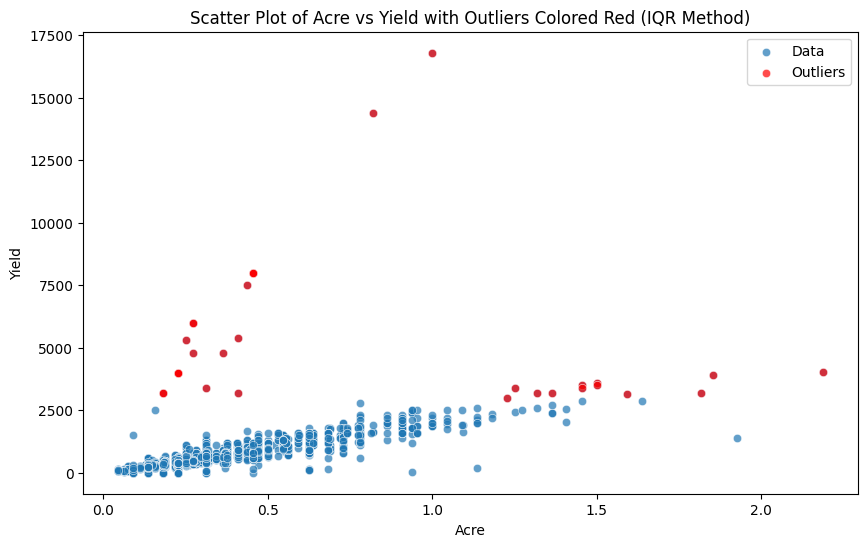

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame with columns 'Acre' and 'Yield'
# Replace 'Acre' and 'Yield' with your actual column names

# Calculate the interquartile range (IQR) for 'Yield'
Q1 = train['Yield'].quantile(0.25)
Q3 = train['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers (e.g., 7 times the IQR)
threshold = 5

# Identify outliers in 'Yield' based on IQR
outliers_Yield = (train['Yield'] < (Q1 - threshold * IQR)) | (train['Yield'] > (Q3 + threshold * IQR))

# Visualize the scatter plot with outliers colored red
plt.figure(figsize=(10, 6))

# Plot the entire data
sns.scatterplot(x='Acre', y='Yield', data=train, alpha=0.7, label='Data')

# Color outliers in 'Yield' with red
sns.scatterplot(x=train.loc[outliers_Yield, 'Acre'], y=train.loc[outliers_Yield, 'Yield'], color='red', alpha=0.7, label='Outliers')

plt.title('Scatter Plot of Acre vs Yield with Outliers Colored Red (IQR Method)')
plt.xlabel('Acre')
plt.ylabel('Yield')
plt.legend()
plt.show()

# Drop rows with outliers from the DataFrame
train = train[~outliers_Yield]

In [19]:
print(train.shape)

(3839, 40)


In [20]:
def convert_types(df):
    # Convert data types to reduce memory
    for c in df:
        col_type = str(df[c].dtypes)
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

        # Convert objects to category
        if col_type == 'object':
            df[c] = df[c].astype('category')

        # numerics
        elif col_type in numerics:
            c_min = df[c].min()
            c_max = df[c].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)

    return df

In [21]:
train = convert_types(train)
test = convert_types(test)

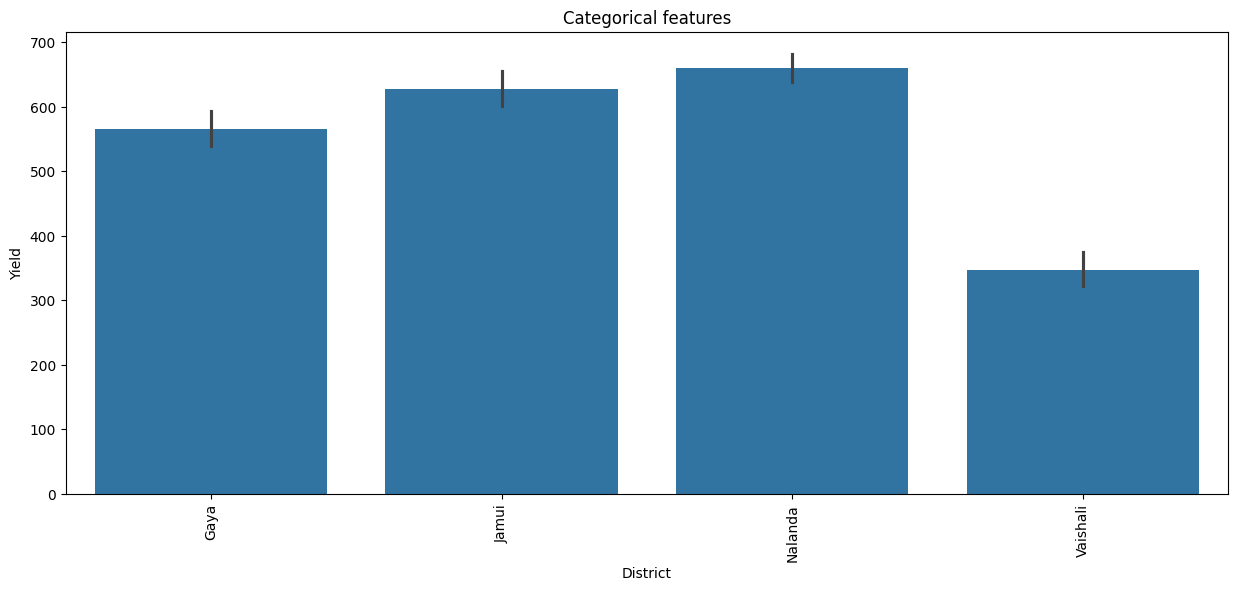

In [22]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(train, x='District', y='Yield')
ax.set_title(f"Categorical features")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

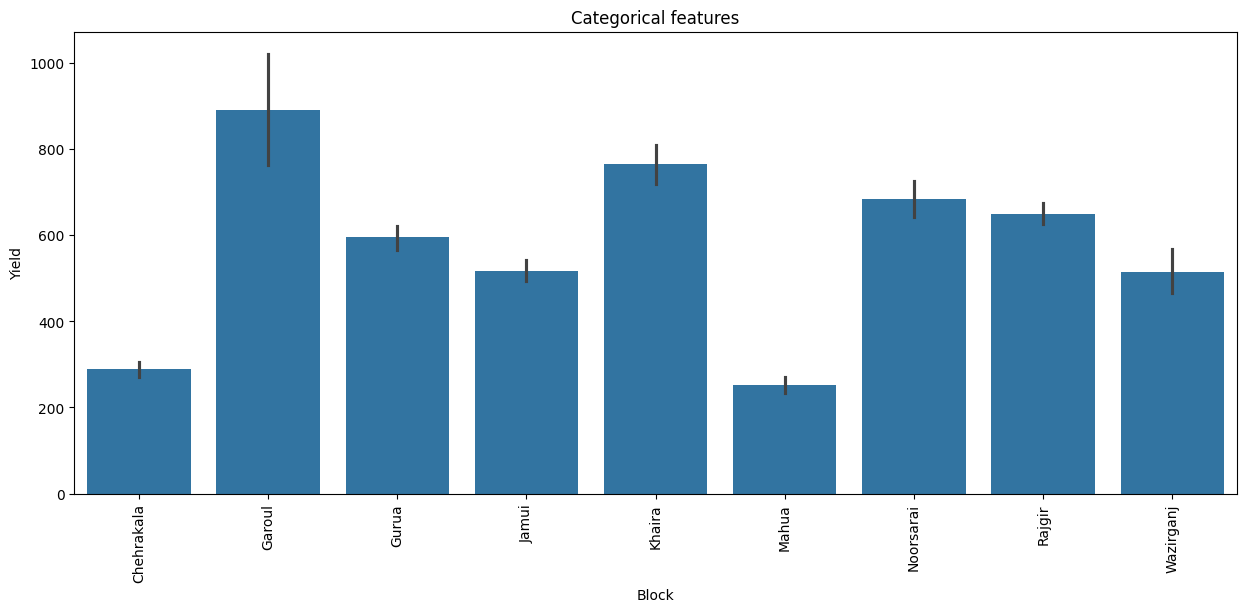

In [23]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(train, x='Block', y='Yield')
ax.set_title(f"Categorical features")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

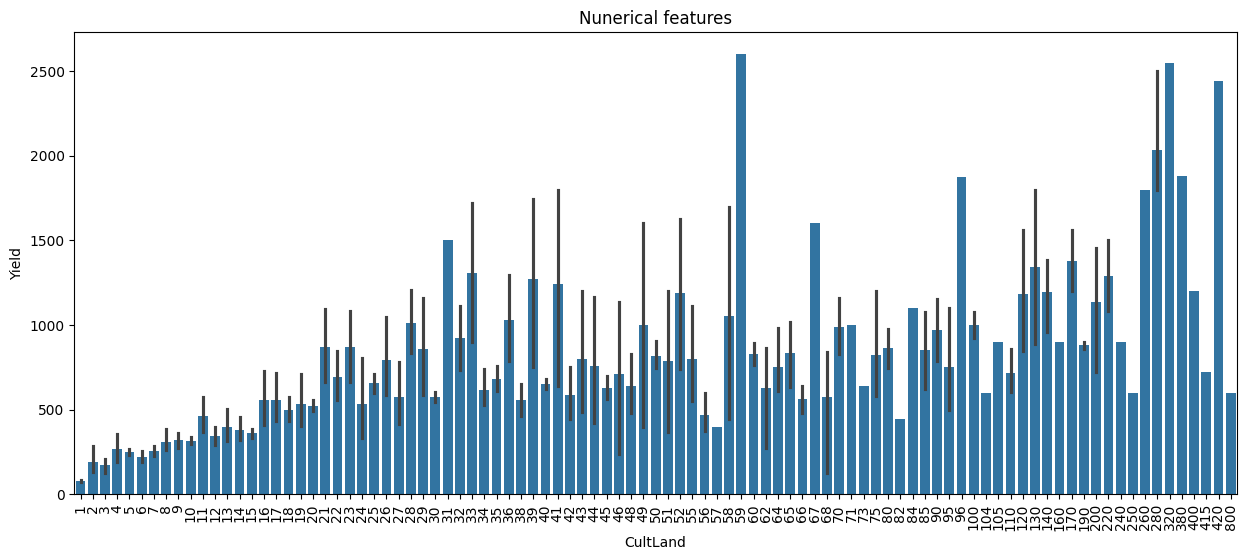

In [24]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(train, x='CultLand', y='Yield')
ax.set_title(f"Nunerical features")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

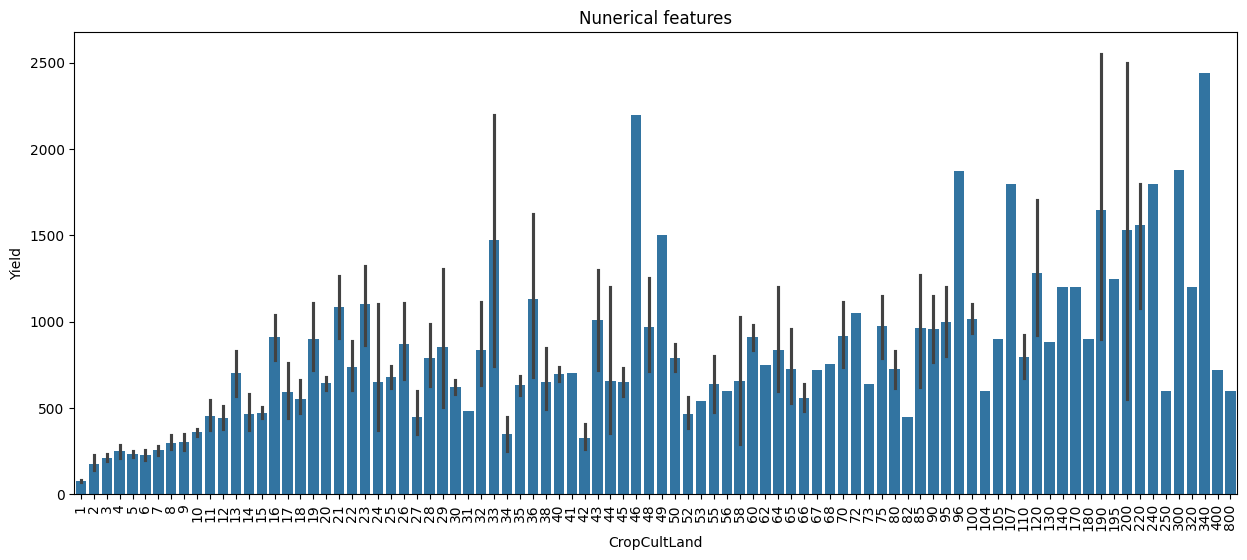

In [25]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(train, x='CropCultLand', y='Yield')
ax.set_title(f"Nunerical features")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

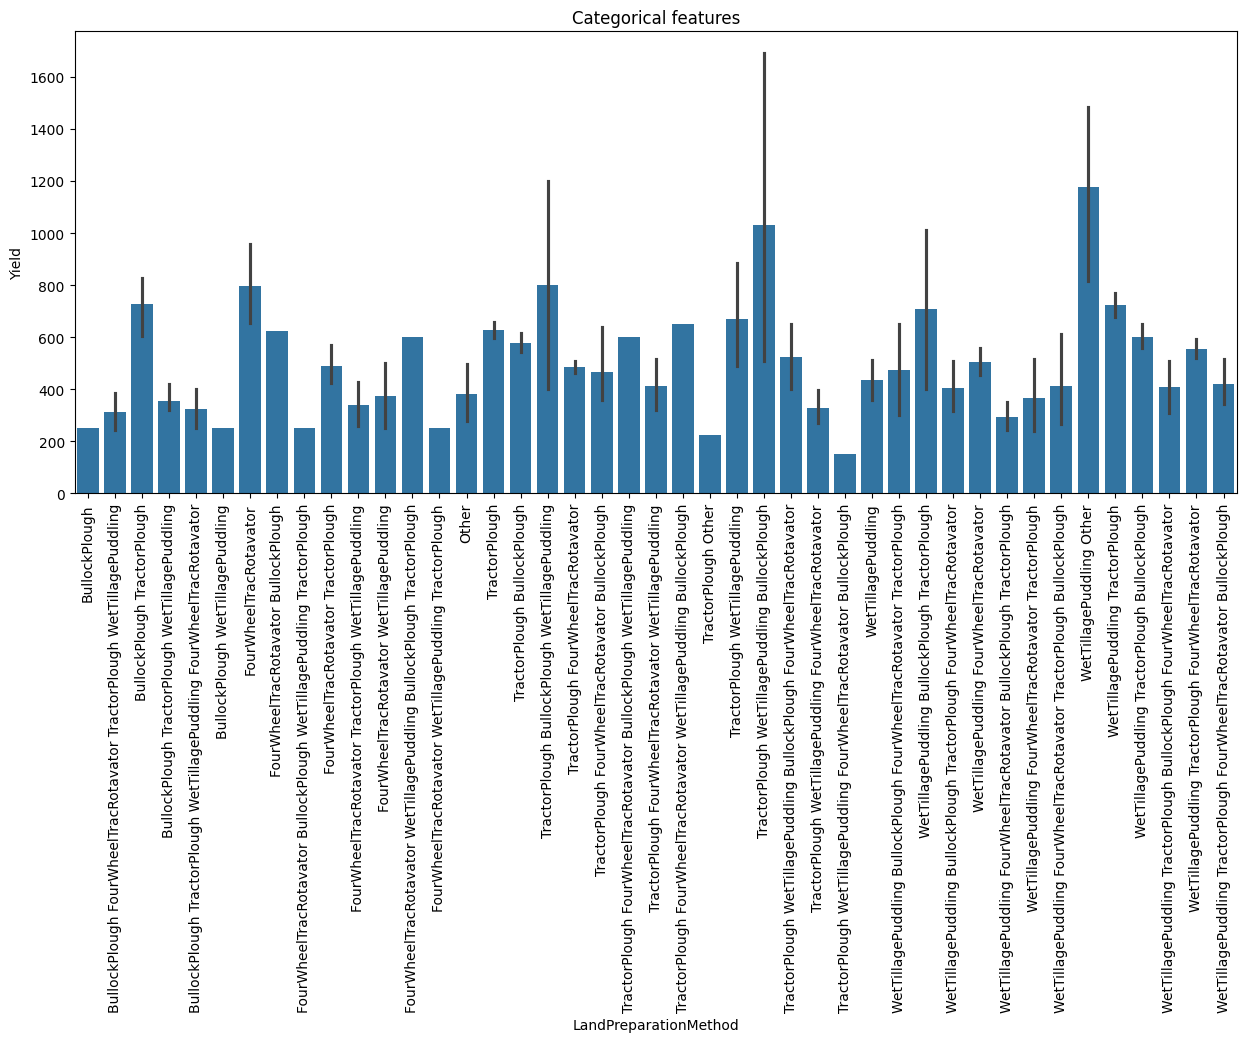

In [26]:
plt.figure(figsize=(15, 6))

ax = sns.barplot(train, x='LandPreparationMethod', y='Yield')
ax.set_title(f"Categorical features")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

In [27]:
list(train.columns)

['ID',
 'District',
 'Block',
 'CultLand',
 'CropCultLand',
 'LandPreparationMethod',
 'CropTillageDate',
 'CropTillageDepth',
 'CropEstMethod',
 'RcNursEstDate',
 'SeedingSowingTransplanting',
 'SeedlingsPerPit',
 'NursDetFactor',
 'TransDetFactor',
 'TransplantingIrrigationHours',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'TransIrriCost',
 'StandingWater',
 'OrgFertilizers',
 'PCropSolidOrgFertAppMethod',
 'NoFertilizerAppln',
 'CropbasalFerts',
 'BasalDAP',
 'BasalUrea',
 'MineralFertAppMethod',
 'FirstTopDressFert',
 '1tdUrea',
 '1appDaysUrea',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Harv_date',
 'Harv_hand_rent',
 'Threshing_date',
 'Threshing_method',
 'Residue_length',
 'Residue_perc',
 'Stubble_use',
 'Acre',
 'Yield']

In [28]:
cat_cols = ['District','Block','CultLand','CropCultLand','LandPreparationMethod','CropEstMethod',
            'NursDetFactor',	'TransDetFactor','TransplantingIrrigationSource',	'TransIrriCost',
            'TransplantingIrrigationPowerSource','OrgFertilizers',	'PCropSolidOrgFertAppMethod',\
            'CropbasalFerts','MineralFertAppMethod',	'FirstTopDressFert','MineralFertAppMethod.1',
            'Harv_method','Threshing_method','Stubble_use']

In [29]:
df = train

In [30]:
feature_list = list(train.columns)
feature_list = [col for col in feature_list if col not in ['ID', 'Yield','Threshing_date','CropTillageDate','RcNursEstDate','Harv_date','SeedingSowingTransplanting']] # +cat_cols

In [32]:
cat_cols = ['District','Block','CultLand','CropCultLand','LandPreparationMethod','CropEstMethod',
            'NursDetFactor',	'TransDetFactor','TransplantingIrrigationSource',	'TransIrriCost',
            'TransplantingIrrigationPowerSource','OrgFertilizers',	'PCropSolidOrgFertAppMethod',\
            'CropbasalFerts','MineralFertAppMethod',	'FirstTopDressFert','MineralFertAppMethod.1',
            'Harv_method','Threshing_method','Stubble_use']

<Axes: >

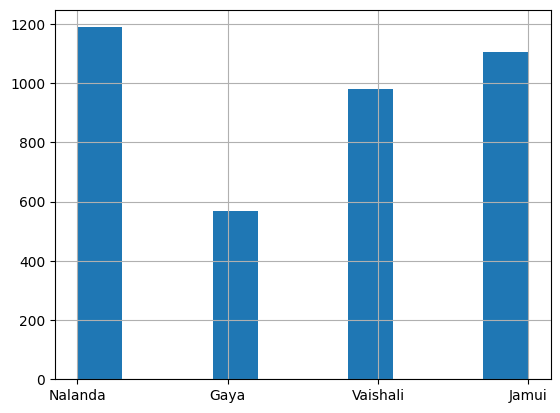

In [33]:
#for c in cat_cols:
train['District'].hist()

In [34]:
def reduce_mem_usage_colwise(col):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_type = col.dtypes
    if col_type in numerics:
        c_min = col.min()
        c_max = col.max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                col = col.astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                col = col.astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                col = col.astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                col = col.astype(np.int64)
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                col = col.astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                col = col.astype(np.float32)
            else:
                col = col.astype(np.float64)
    return col

In [35]:
df = pd.concat([train, test])

<Axes: >

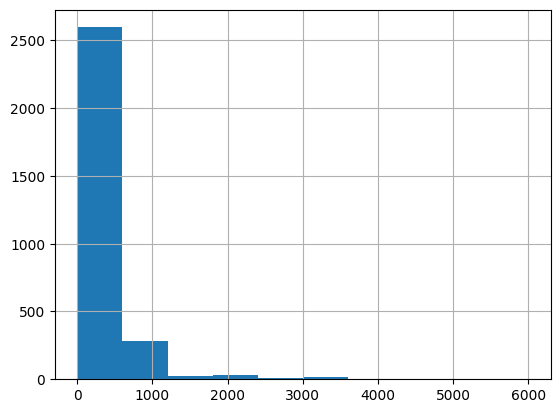

In [36]:
train['TransIrriCost'].hist()

In [37]:
date_cols = [col for col in df.columns if col.__contains__("Date") or col.__contains__("date")]
date_cols

['CropTillageDate', 'RcNursEstDate', 'Harv_date', 'Threshing_date']

# Function to generate datetime features:

In [38]:
basic_attrs = ['month', 'year', 'quarter', 'dayofweek', 'weekofyear']  # , 'is_month_start', 'is_month_end'
for col in ['CropTillageDate', 'RcNursEstDate', 'Harv_date', 'Threshing_date','SeedingSowingTransplanting']:
    df[col] = df[col].astype('datetime64')
    for attr in basic_attrs:
        col_name = f"{col}_{attr}"
        df[col_name] = getattr(df[col].dt, attr)

In [39]:
df.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            NaN                        NaN                  2           Urea   
1            NaN                        NaN                  2       DAP Urea   
2    Ganaura FYM                SoilApplied                  2            DAP   
3        Ganaura                SoilApplied                  2       DAP Urea   
4            NaN                        NaN                  2       Urea DAP   

   BasalDAP  BasalUrea MineralFertAppMethod FirstTopDressFert  1tdUrea  \
0       NaN       20.0         Broadcasting              Urea     15.0   
1      15.0       10.0         Broadcasting              Urea     20.0   
2       4.0        NaN          SoilApplied              Urea      5.0   
3       6.0        3.0         Broadcasting              Urea      5.0   
4      15.0       30.0         Broadcasting              Urea     30.0   

   1appDaysUrea MineralFertAppMethod.1 Harv_method  Harv_date  Harv_hand_rent  \
0          18.0           Broadcastin

In [40]:
df.shape

(5129, 65)

In [41]:
train = df[:train.shape[0]].reset_index(drop=True)
test = df[train.shape[0]:].reset_index(drop=True)

test = test.drop(['Yield'], axis =1)

print(train.shape, test.shape)

(3839, 65) (1290, 64)


In [42]:
categorical_feats= train.dtypes[train.dtypes == "category"].index;
len(categorical_feats)

7

In [43]:
categorical_feats

Index(['District', 'CropEstMethod', 'PCropSolidOrgFertAppMethod',
       'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method',
       'Stubble_use'],
      dtype='object')

In [44]:
numerical_feats= train.dtypes[train.dtypes != "category"].index;
len(numerical_feats)

58

In [45]:
len(categorical_feats)+len(numerical_feats)

65

In [46]:
categorical_feats

Index(['District', 'CropEstMethod', 'PCropSolidOrgFertAppMethod',
       'MineralFertAppMethod.1', 'Harv_method', 'Threshing_method',
       'Stubble_use'],
      dtype='object')

In [ ]:
numerical_feats

In [ ]:
cat_cols = [col for col in categorical_feats if col not in ['Yield','ID']]
cat_cols = cat_cols+['NursDetFactor',	'TransDetFactor','Block','LandPreparationMethod',\
                     'TransplantingIrrigationSource','TransplantingIrrigationPowerSource',\
                     'OrgFertilizers','MineralFertAppMethod','CropbasalFerts','FirstTopDressFert']

for col in cat_cols:
  train[col]=train[col].astype('category')
  test[col]=test[col].astype('category')

print(len(cat_cols))
cat_cols

In [ ]:
nume = [col for col in train.columns if col not in cat_cols+['Yield','ID']]
num_cols = [col for col in nume if col not in cat_cols+['Yield','ID']]
print(len(num_cols))
num_cols

In [51]:
dat_cols = ['CropTillageDate', 'RcNursEstDate', 'Harv_date', \
            'Threshing_date','SeedingSowingTransplanting']

In [52]:
num_cols  = [col for col in num_cols if col not in dat_cols+cat_cols]
print(len(num_cols))

41


In [53]:
cat_columns = cat_cols
cat_columns

['District',
 'CropEstMethod',
 'PCropSolidOrgFertAppMethod',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Threshing_method',
 'Stubble_use',
 'NursDetFactor',
 'TransDetFactor',
 'Block',
 'LandPreparationMethod',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'OrgFertilizers',
 'MineralFertAppMethod',
 'CropbasalFerts',
 'FirstTopDressFert']

In [54]:
data = pd.concat([train,test])

In [55]:
num_cols1 = ['CropCultLand','CropTillageDepth','SeedlingsPerPit','TransplantingIrrigationHours',\
             'TransIrriCost','StandingWater', 'BasalDAP', 'BasalUrea', '1tdUrea',\
             '1appDaysUrea','Residue_length','Residue_perc','Acre']

# **Aggregration 1:**

**Using "District" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [56]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("District")[col].mean().reset_index()
    gdf.columns = ["District", "District_"+col+"_mean"]
    data = pd.merge(data, gdf, on="District", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("District")[col].median().reset_index()
    gdf.columns = ["District", "District_"+col+"_median"]
    data = pd.merge(data, gdf, on="District", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("District")[col].min().reset_index()
    gdf.columns = ["District", "District_"+col+"_min"]
    data = pd.merge(data, gdf, on="District", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("District")[col].max().reset_index()
    gdf.columns = ["District", "District_"+col+"_max"]
    data = pd.merge(data, gdf, on="District", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("District")[col].sum().reset_index()
    gdf.columns = ["District", "District_"+col+"_sum"]
    data = pd.merge(data, gdf, on="District", how="left")

**Using "CropEstMethod" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [57]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("CropEstMethod")[col].mean().reset_index()
    gdf.columns = ["CropEstMethod", "CropEstMethod_"+col+"_mean"]
    data = pd.merge(data, gdf, on="CropEstMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("CropEstMethod")[col].median().reset_index()
    gdf.columns = ["CropEstMethod", "CropEstMethod_"+col+"_median"]
    data = pd.merge(data, gdf, on="CropEstMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("CropEstMethod")[col].min().reset_index()
    gdf.columns = ["CropEstMethod", "CropEstMethod_"+col+"_min"]
    data = pd.merge(data, gdf, on="CropEstMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("CropEstMethod")[col].max().reset_index()
    gdf.columns = ["CropEstMethod", "CropEstMethod_"+col+"_max"]
    data = pd.merge(data, gdf, on="CropEstMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("CropEstMethod")[col].sum().reset_index()
    gdf.columns = ["CropEstMethod", "CropEstMethod_"+col+"_sum"]
    data = pd.merge(data, gdf, on="CropEstMethod", how="left")

**Using "PCropSolidOrgFertAppMethod" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [58]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("PCropSolidOrgFertAppMethod")[col].mean().reset_index()
    gdf.columns = ["PCropSolidOrgFertAppMethod", "PCropSolidOrgFertAppMethod_"+col+"_mean"]
    data = pd.merge(data, gdf, on="PCropSolidOrgFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("PCropSolidOrgFertAppMethod")[col].median().reset_index()
    gdf.columns = ["PCropSolidOrgFertAppMethod", "PCropSolidOrgFertAppMethod_"+col+"_median"]
    data = pd.merge(data, gdf, on="PCropSolidOrgFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("PCropSolidOrgFertAppMethod")[col].min().reset_index()
    gdf.columns = ["PCropSolidOrgFertAppMethod", "PCropSolidOrgFertAppMethod_"+col+"_min"]
    data = pd.merge(data, gdf, on="PCropSolidOrgFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("PCropSolidOrgFertAppMethod")[col].max().reset_index()
    gdf.columns = ["PCropSolidOrgFertAppMethod", "PCropSolidOrgFertAppMethod_"+col+"_max"]
    data = pd.merge(data, gdf, on="PCropSolidOrgFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("PCropSolidOrgFertAppMethod")[col].sum().reset_index()
    gdf.columns = ["PCropSolidOrgFertAppMethod", "PCropSolidOrgFertAppMethod_"+col+"_sum"]
    data = pd.merge(data, gdf, on="PCropSolidOrgFertAppMethod", how="left")

**Using "MineralFertAppMethod.1" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [59]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod.1")[col].mean().reset_index()
    gdf.columns = ["MineralFertAppMethod.1", "MineralFertAppMethod.1_"+col+"_mean"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod.1", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod.1")[col].median().reset_index()
    gdf.columns = ["MineralFertAppMethod.1", "MineralFertAppMethod.1_"+col+"_median"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod.1", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod.1")[col].min().reset_index()
    gdf.columns = ["MineralFertAppMethod.1", "MineralFertAppMethod.1_"+col+"_min"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod.1", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod.1")[col].max().reset_index()
    gdf.columns = ["MineralFertAppMethod.1", "MineralFertAppMethod.1_"+col+"_max"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod.1", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod.1")[col].sum().reset_index()
    gdf.columns = ["MineralFertAppMethod.1", "MineralFertAppMethod.1_"+col+"_sum"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod.1", how="left")

In [60]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod")[col].mean().reset_index()
    gdf.columns = ["MineralFertAppMethod", "MineralFertAppMethod_"+col+"_mean"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod")[col].median().reset_index()
    gdf.columns = ["MineralFertAppMethod", "MineralFertAppMethod_"+col+"_median"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod")[col].min().reset_index()
    gdf.columns = ["MineralFertAppMethod", "MineralFertAppMethod_"+col+"_min"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod")[col].max().reset_index()
    gdf.columns = ["MineralFertAppMethod", "MineralFertAppMethod_"+col+"_max"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("MineralFertAppMethod")[col].sum().reset_index()
    gdf.columns = ["MineralFertAppMethod", "MineralFertAppMethod_"+col+"_sum"]
    data = pd.merge(data, gdf, on="MineralFertAppMethod", how="left")

**Using "Harv_method" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [61]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Harv_method")[col].mean().reset_index()
    gdf.columns = ["Harv_method", "Harv_method_"+col+"_mean"]
    data = pd.merge(data, gdf, on="Harv_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Harv_method")[col].median().reset_index()
    gdf.columns = ["Harv_method", "Harv_method_"+col+"_median"]
    data = pd.merge(data, gdf, on="Harv_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Harv_method")[col].min().reset_index()
    gdf.columns = ["Harv_method", "Harv_method_"+col+"_min"]
    data = pd.merge(data, gdf, on="Harv_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Harv_method")[col].max().reset_index()
    gdf.columns = ["Harv_method", "Harv_method_"+col+"_max"]
    data = pd.merge(data, gdf, on="Harv_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Harv_method")[col].sum().reset_index()
    gdf.columns = ["Harv_method", "Harv_method_"+col+"_sum"]
    data = pd.merge(data, gdf, on="Harv_method", how="left")

**Using "Threshing_method" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [62]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Threshing_method")[col].mean().reset_index()
    gdf.columns = ["Threshing_method", "Threshing_method_"+col+"_mean"]
    data = pd.merge(data, gdf, on="Threshing_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Threshing_method")[col].median().reset_index()
    gdf.columns = ["Threshing_method", "Threshing_method_"+col+"_median"]
    data = pd.merge(data, gdf, on="Threshing_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Threshing_method")[col].min().reset_index()
    gdf.columns = ["Threshing_method", "Threshing_method_"+col+"_min"]
    data = pd.merge(data, gdf, on="Threshing_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Threshing_method")[col].max().reset_index()
    gdf.columns = ["Threshing_method", "Threshing_method_"+col+"_max"]
    data = pd.merge(data, gdf, on="Threshing_method", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Threshing_method")[col].sum().reset_index()
    gdf.columns = ["Threshing_method", "Threshing_method_"+col+"_sum"]
    data = pd.merge(data, gdf, on="Threshing_method", how="left")

**Using "Stubble_use" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [63]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Stubble_use")[col].mean().reset_index()
    gdf.columns = ["Stubble_use", "Stubble_use_"+col+"_mean"]
    data = pd.merge(data, gdf, on="Stubble_use", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Stubble_use")[col].median().reset_index()
    gdf.columns = ["Stubble_use", "Stubble_use_"+col+"_median"]
    data = pd.merge(data, gdf, on="Stubble_use", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Stubble_use")[col].min().reset_index()
    gdf.columns = ["Stubble_use", "Stubble_use_"+col+"_min"]
    data = pd.merge(data, gdf, on="Stubble_use", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Stubble_use")[col].max().reset_index()
    gdf.columns = ["Stubble_use", "Stubble_use_"+col+"_max"]
    data = pd.merge(data, gdf, on="Stubble_use", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Stubble_use")[col].sum().reset_index()
    gdf.columns = ["Stubble_use", "Stubble_use_"+col+"_sum"]
    data = pd.merge(data, gdf, on="Stubble_use", how="left")

**Using "NursDetFactor" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [64]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("NursDetFactor")[col].mean().reset_index()
    gdf.columns = ["NursDetFactor", "NursDetFactor_"+col+"_mean"]
    data = pd.merge(data, gdf, on="NursDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("NursDetFactor")[col].median().reset_index()
    gdf.columns = ["NursDetFactor", "NursDetFactor_"+col+"_median"]
    data = pd.merge(data, gdf, on="NursDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("NursDetFactor")[col].min().reset_index()
    gdf.columns = ["NursDetFactor", "NursDetFactor_"+col+"_min"]
    data = pd.merge(data, gdf, on="NursDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("NursDetFactor")[col].max().reset_index()
    gdf.columns = ["NursDetFactor", "NursDetFactor_"+col+"_max"]
    data = pd.merge(data, gdf, on="NursDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("NursDetFactor")[col].sum().reset_index()
    gdf.columns = ["NursDetFactor", "NursDetFactor_"+col+"_sum"]
    data = pd.merge(data, gdf, on="NursDetFactor", how="left")

**Using "TransDetFactor" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [65]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransDetFactor")[col].mean().reset_index()
    gdf.columns = ["TransDetFactor", "TransDetFactor_"+col+"_mean"]
    data = pd.merge(data, gdf, on="TransDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransDetFactor")[col].median().reset_index()
    gdf.columns = ["TransDetFactor", "TransDetFactor_"+col+"_median"]
    data = pd.merge(data, gdf, on="TransDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransDetFactor")[col].min().reset_index()
    gdf.columns = ["TransDetFactor", "TransDetFactor_"+col+"_min"]
    data = pd.merge(data, gdf, on="TransDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransDetFactor")[col].max().reset_index()
    gdf.columns = ["TransDetFactor", "TransDetFactor_"+col+"_max"]
    data = pd.merge(data, gdf, on="TransDetFactor", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransDetFactor")[col].sum().reset_index()
    gdf.columns = ["TransDetFactor", "TransDetFactor_"+col+"_sum"]
    data = pd.merge(data, gdf, on="TransDetFactor", how="left")

**Using "Block" to groupby few selected numerical features to generate more useful features.**

**(using different statistics e.g mean, median, max, min, std, sum, skew)**

In [66]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Block")[col].mean().reset_index()
    gdf.columns = ["Block", "Block_"+col+"_mean"]
    data = pd.merge(data, gdf, on="Block", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Block")[col].median().reset_index()
    gdf.columns = ["Block", "Block_"+col+"_median"]
    data = pd.merge(data, gdf, on="Block", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Block")[col].min().reset_index()
    gdf.columns = ["Block", "Block_"+col+"_min"]
    data = pd.merge(data, gdf, on="Block", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Block")[col].max().reset_index()
    gdf.columns = ["Block", "Block_"+col+"_max"]
    data = pd.merge(data, gdf, on="Block", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("Block")[col].sum().reset_index()
    gdf.columns = ["Block", "Block_"+col+"_sum"]
    data = pd.merge(data, gdf, on="Block", how="left")

In [67]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("LandPreparationMethod")[col].mean().reset_index()
    gdf.columns = ["LandPreparationMethod", "LandPreparationMethod_"+col+"_mean"]
    data = pd.merge(data, gdf, on="LandPreparationMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("LandPreparationMethod")[col].median().reset_index()
    gdf.columns = ["LandPreparationMethod", "LandPreparationMethod_"+col+"_median"]
    data = pd.merge(data, gdf, on="LandPreparationMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("LandPreparationMethod")[col].min().reset_index()
    gdf.columns = ["LandPreparationMethod", "LandPreparationMethod_"+col+"_min"]
    data = pd.merge(data, gdf, on="LandPreparationMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("LandPreparationMethod")[col].max().reset_index()
    gdf.columns = ["LandPreparationMethod", "LandPreparationMethod_"+col+"_max"]
    data = pd.merge(data, gdf, on="LandPreparationMethod", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("LandPreparationMethod")[col].sum().reset_index()
    gdf.columns = ["LandPreparationMethod", "LandPreparationMethod_"+col+"_sum"]
    data = pd.merge(data, gdf, on="LandPreparationMethod", how="left")

In [68]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationSource")[col].mean().reset_index()
    gdf.columns = ["TransplantingIrrigationSource", "TransplantingIrrigationSource_"+col+"_mean"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationSource")[col].median().reset_index()
    gdf.columns = ["TransplantingIrrigationSource", "TransplantingIrrigationSource_"+col+"_median"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationSource")[col].min().reset_index()
    gdf.columns = ["TransplantingIrrigationSource", "TransplantingIrrigationSource_"+col+"_min"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationSource")[col].max().reset_index()
    gdf.columns = ["TransplantingIrrigationSource", "TransplantingIrrigationSource_"+col+"_max"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationSource")[col].sum().reset_index()
    gdf.columns = ["TransplantingIrrigationSource", "TransplantingIrrigationSource_"+col+"_sum"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationSource", how="left")

In [69]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationPowerSource")[col].mean().reset_index()
    gdf.columns = ["TransplantingIrrigationPowerSource", "TransplantingIrrigationPowerSource_"+col+"_mean"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationPowerSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationPowerSource")[col].median().reset_index()
    gdf.columns = ["TransplantingIrrigationPowerSource", "TransplantingIrrigationPowerSource_"+col+"_median"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationPowerSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationPowerSource")[col].min().reset_index()
    gdf.columns = ["TransplantingIrrigationPowerSource", "TransplantingIrrigationPowerSource_"+col+"_min"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationPowerSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationPowerSource")[col].max().reset_index()
    gdf.columns = ["TransplantingIrrigationPowerSource", "TransplantingIrrigationPowerSource_"+col+"_max"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationPowerSource", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("TransplantingIrrigationPowerSource")[col].sum().reset_index()
    gdf.columns = ["TransplantingIrrigationPowerSource", "TransplantingIrrigationPowerSource_"+col+"_sum"]
    data = pd.merge(data, gdf, on="TransplantingIrrigationPowerSource", how="left")

In [70]:
### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("OrgFertilizers")[col].mean().reset_index()
    gdf.columns = ["OrgFertilizers", "OrgFertilizers_"+col+"_mean"]
    data = pd.merge(data, gdf, on="OrgFertilizers", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("OrgFertilizers")[col].median().reset_index()
    gdf.columns = ["OrgFertilizers", "OrgFertilizers_"+col+"_median"]
    data = pd.merge(data, gdf, on="OrgFertilizers", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("OrgFertilizers")[col].min().reset_index()
    gdf.columns = ["OrgFertilizers", "OrgFertilizers_"+col+"_min"]
    data = pd.merge(data, gdf, on="OrgFertilizers", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("OrgFertilizers")[col].max().reset_index()
    gdf.columns = ["OrgFertilizers", "OrgFertilizers_"+col+"_max"]
    data = pd.merge(data, gdf, on="OrgFertilizers", how="left")

### get the mean of important columns
for col in num_cols1:
    gdf = data.groupby("OrgFertilizers")[col].sum().reset_index()
    gdf.columns = ["OrgFertilizers", "OrgFertilizers_"+col+"_sum"]
    data = pd.merge(data, gdf, on="OrgFertilizers", how="left")

In [72]:
data.head(4)

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            NaN                        NaN                  2           Urea   
1            NaN                        NaN                  2       DAP Urea   
2    Ganaura FYM                SoilApplied                  2            DAP   
3        Ganaura                SoilApplied                  2       DAP Urea   

   BasalDAP  BasalUrea MineralFertAppMethod FirstTopDressFert  1tdUrea  \
0       NaN       20.0         Broadcasting              Urea     15.0   
1      15.0       10.0         Broadcasting              Urea     20.0   
2       4.0        NaN          SoilApplied              Urea      5.0   
3       6.0        3.0         Broadcasting              Urea      5.0   

   1appDaysUrea MineralFertAppMethod.1 Harv_method  Harv_date  Harv_hand_rent  \
0          18.0           Broadcasting     machine 2022-11-16             NaN   
1          39.0           Broadcasting        hand 2022-11-25             3.0   
2          65.0        RootApplication        hand 2022-12-12           480.0   
3           5.0           Broadcasting        hand 2022-12-02           240.0   

  Threshing_date Threshing_method  Residue_length  Residue_perc  \
0     2022-11-16          machine              30            40   
1     2022-12-24          machine              24            10   
2     2023-01-11          machine              30            10   
3     2022-12-29             hand              26            10   

      Stubble_use      A

In [73]:
train=data.iloc[:3839,]
test= data.iloc[3839:,]

test.drop("Yield",axis=1, inplace=True)

print(train.shape, test.shape)

(3839, 1040) (1290, 1039)


In [74]:
cat_columns1 = cat_cols
len(cat_columns1)

17

In [75]:
rank_cols = ['District','CropEstMethod','Block','LandPreparationMethod']
freq_cols = ['District','CropEstMethod','Block','LandPreparationMethod']
rank_cols

['District', 'CropEstMethod', 'Block', 'LandPreparationMethod']

# Frequency Encoding of all categorical columns:

In [76]:
for col in freq_cols:
    train[f'{col}_freq'] = train[col].map(train[col].value_counts())
    test[f'{col}_freq'] = test[col].map(test[col].value_counts())

train.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            NaN                        NaN                  2           Urea   
1            NaN                        NaN                  2       DAP Urea   
2    Ganaura FYM                SoilApplied                  2            DAP   
3        Ganaura                SoilApplied                  2       DAP Urea   
4            NaN                        NaN                  2       Urea DAP   

   BasalDAP  BasalUrea MineralFertAppMethod FirstTopDressFert  1tdUrea  \
0       NaN       20.0         Broadcasting              Urea     15.0   
1      15.0       10.0         Broadcasting              Urea     20.0   
2       4.0        NaN          SoilApplied              Urea      5.0   
3       6.0        3.0         Broadcasting              Urea      5.0   
4      15.0       30.0         Broadcasting              Urea     30.0   

   1appDaysUrea MineralFertAppMethod.1 Harv_method  Harv_date  Harv_hand_rent  \
0          18.0           Broadcastin

# Rank Encoding of all categorical columns:

In [77]:
from scipy.stats import rankdata
for col in rank_cols:
    train[f'{col}_rank'] = rankdata(train[f'{col}_freq']) / train.shape[0]
    test[f'{col}_rank'] = rankdata(test[f'{col}_freq']) / test.shape[0]

train.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            NaN                        NaN                  2           Urea   
1            NaN                        NaN                  2       DAP Urea   
2    Ganaura FYM                SoilApplied                  2            DAP   
3        Ganaura                SoilApplied                  2       DAP Urea   
4            NaN                        NaN                  2       Urea DAP   

   BasalDAP  BasalUrea MineralFertAppMethod FirstTopDressFert  1tdUrea  \
0       NaN       20.0         Broadcasting              Urea     15.0   
1      15.0       10.0         Broadcasting              Urea     20.0   
2       4.0        NaN          SoilApplied              Urea      5.0   
3       6.0        3.0         Broadcasting              Urea      5.0   
4      15.0       30.0         Broadcasting              Urea     30.0   

   1appDaysUrea MineralFertAppMethod.1 Harv_method  Harv_date  Harv_hand_rent  \
0          18.0           Broadcastin

In [ ]:
cat_columns1 = [col for col in cat_columns1]
print(len(cat_columns1))
cat_columns1

In [81]:
drop_cols = ['CropTillageDate_year','RcNursEstDate_year','SeedingSowingTransplanting_year']
train = train.drop(drop_cols, axis = 1)
test = test.drop(drop_cols, axis = 1)
train.shape, test.shape

((3839, 1045), (1290, 1044))

In [82]:
date_cat_columns2 = ['CropTillageDate_month','CropTillageDate_quarter','CropTillageDate_dayofweek',
                     'CropTillageDate_weekofyear','CropTillageDate_is_month_start',
                     'CropTillageDate_is_month_end','CropTillageDate_weekend','RcNursEstDate_month',
                     'RcNursEstDate_quarter','RcNursEstDate_dayofweek','RcNursEstDate_weekofyear',
                     'RcNursEstDate_is_month_start','RcNursEstDate_is_month_end','RcNursEstDate_weekend',
                     'Harv_date_month','Harv_date_year','Harv_date_quarter','Harv_date_dayofweek',
                     'Harv_date_weekofyear','Harv_date_is_month_start','Harv_date_is_month_end',
                     'Harv_date_weekend','Threshing_date_month','Threshing_date_year',
                     'Threshing_date_quarter','Threshing_date_dayofweek','Threshing_date_weekofyear',
                     'Threshing_date_is_month_start','Threshing_date_is_month_end',
                     'Threshing_date_weekend','SeedingSowingTransplanting_month',
                     'SeedingSowingTransplanting_quarter','SeedingSowingTransplanting_dayofweek',
                     'SeedingSowingTransplanting_weekofyear','SeedingSowingTransplanting_is_month_start',
                     'SeedingSowingTransplanting_is_month_end','SeedingSowingTransplanting_weekend']

boolean_cols = ['SeedingSowingTransplanting_is_month_end','Harv_date_is_month_end',\
             'Harv_date_is_month_start','CropTillageDate_is_month_start',\
             'RcNursEstDate_is_month_end','RcNursEstDate_is_month_start','CropTillageDate_is_month_end',\
             'Threshing_date_is_month_start','SeedingSowingTransplanting_is_month_start']

date_cat_columns2 = [col for col in date_cat_columns2 if col not in boolean_cols]
date_cat_columns2

['CropTillageDate_month',
 'CropTillageDate_quarter',
 'CropTillageDate_dayofweek',
 'CropTillageDate_weekofyear',
 'CropTillageDate_weekend',
 'RcNursEstDate_month',
 'RcNursEstDate_quarter',
 'RcNursEstDate_dayofweek',
 'RcNursEstDate_weekofyear',
 'RcNursEstDate_weekend',
 'Harv_date_month',
 'Harv_date_year',
 'Harv_date_quarter',
 'Harv_date_dayofweek',
 'Harv_date_weekofyear',
 'Harv_date_weekend',
 'Threshing_date_month',
 'Threshing_date_year',
 'Threshing_date_quarter',
 'Threshing_date_dayofweek',
 'Threshing_date_weekofyear',
 'Threshing_date_is_month_end',
 'Threshing_date_weekend',
 'SeedingSowingTransplanting_month',
 'SeedingSowingTransplanting_quarter',
 'SeedingSowingTransplanting_dayofweek',
 'SeedingSowingTransplanting_weekofyear',
 'SeedingSowingTransplanting_weekend']

In [83]:
cat_columns1 = list(set(cat_columns1))

In [84]:
cat_features = list(set([*cat_columns1]))
cat_features

['TransplantingIrrigationPowerSource',
 'TransplantingIrrigationSource',
 'District',
 'FirstTopDressFert',
 'OrgFertilizers',
 'MineralFertAppMethod',
 'CropEstMethod',
 'Harv_method',
 'LandPreparationMethod',
 'CropbasalFerts',
 'TransDetFactor',
 'Threshing_method',
 'PCropSolidOrgFertAppMethod',
 'MineralFertAppMethod.1',
 'NursDetFactor',
 'Stubble_use',
 'Block']

In [85]:
print(train.shape, test.shape)

(3839, 1045) (1290, 1044)


In [86]:
train.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            NaN                        NaN                  2           Urea   
1            NaN                        NaN                  2       DAP Urea   
2    Ganaura FYM                SoilApplied                  2            DAP   
3        Ganaura                SoilApplied                  2       DAP Urea   
4            NaN                        NaN                  2       Urea DAP   

   BasalDAP  BasalUrea MineralFertAppMethod FirstTopDressFert  1tdUrea  \
0       NaN       20.0         Broadcasting              Urea     15.0   
1      15.0       10.0         Broadcasting              Urea     20.0   
2       4.0        NaN          SoilApplied              Urea      5.0   
3       6.0        3.0         Broadcasting              Urea      5.0   
4      15.0       30.0         Broadcasting              Urea     30.0   

   1appDaysUrea MineralFertAppMethod.1 Harv_method  Harv_date  Harv_hand_rent  \
0          18.0           Broadcastin

In [87]:
data = pd.concat([train,test])

# **Aggregration 2:**

**Generate more features from all cat columns and numerical features**

**(using different statistics stated below)**

In [88]:
id_agg_tags = cat_columns1

qnames = {'25%': 'p25', '50%': 'p50', '75%': 'p75'}

agg_columns = num_cols1

data[agg_columns] = data[agg_columns].astype('float32')

for id_tag in id_agg_tags:
    print(f"\nGrouping with {id_tag}")

    temp = data[[id_tag, *agg_columns]].groupby(id_tag)[agg_columns].describe().rename(columns=qnames)

    temp.columns = ["_".join(col) for col in temp.columns]
    temp = temp.drop(columns=temp.columns[temp.columns.str.endswith('_count')].tolist())

    temp = temp.add_prefix(f"{id_tag}_").reset_index()
    display(temp.head())

    data = data.merge(temp, on=id_tag, how='left')


Grouping with TransplantingIrrigationPowerSource


TransplantingIrrigationPowerSource  \
0                             Diesel   
1                           Electric   
2                              Solar   

   TransplantingIrrigationPowerSource_CropCultLand_mean  \
0                                          12.026343      
1                                          28.263052      
2                                           7.500000      

   TransplantingIrrigationPowerSource_CropCultLand_std  \
0                                           9.172419     
1                                          30.297213     
2                                           3.535534     

   TransplantingIrrigationPowerSource_CropCultLand_min  \
0                                                1.0     
1                                                1.0     
2                                                5.0     

   TransplantingIrrigationPowerSource_CropCultLand_p25  \
0                                               5.00     
1                                              10.00     
2                                               6.25     

   TransplantingIrrigationPowerSource_CropCultLand_p50  \
0                                               10.0     
1                                               20.0     
2                                                7.5     

   TransplantingIrrigationPowerSource_CropCultLand_p75  \
0                                              15.00     
1                                              35.00     
2                                               8.75     

   TransplantingIrrigationPowerSource_CropCultLand_max  \
0                                              100.0     
1                                              800.0     
2                                               10.0     

   TransplantingIrrigationPowerSource_CropTillageDepth_mean  \
0                                           4.621707          
1                                           4.455064          
2                                           4.500000          

   TransplantingIrrigationPowerSource_CropTillageDepth_std  \
0                                           0.867360         
1                                           1.160269         
2                                           0.707107         

   TransplantingIrrigationPowerSource_CropTillageDepth_min  \
0                                                1.0         
1                                                1.0         
2                                                4.0         

   TransplantingIrrigationPowerSource_CropTillageDepth_p25  \
0                                               4.00         
1                                               4.00         
2                                               4.25         

   TransplantingIrrigationPowerSource_CropTillageDepth_p50  \
0                                                5.0         
1                                                4.0         
2                                                4.5         

   TransplantingIrrigationPowerSource_CropTillageDepth_p75  \
0                                               5.00         
1                                               5.00         
2                                               4.75         

   TransplantingIrrigationPowerSource_CropTillageDepth_max  \
0                                                8.0         
1                                                8.0         
2                                                5.0         

   TransplantingIrrigationPowerSource_SeedlingsPerPit_mean  \
0                                           2.170576         
1                                           2.821861         
2                                           3.000000         

   TransplantingIrrigationPowerSource_SeedlingsPerPit_std  \
0                                          14.392824        
1                                           2.394701        
2                          


Grouping with TransplantingIrrigationSource


TransplantingIrrigationSource  \
0                        Boring   
1                         Canal   
2                          Pond   
3                       Rainfed   
4                      TubeWell   

   TransplantingIrrigationSource_CropCultLand_mean  \
0                                        24.676897   
1                                        26.115385   
2                                        19.152174   
3                                        33.785713   
4                                         7.944445   

   TransplantingIrrigationSource_CropCultLand_std  \
0                                       28.002884   
1                                       19.840868   
2                                       14.778314   
3                                       19.308098   
4                                        6.457756   

   TransplantingIrrigationSource_CropCultLand_min  \
0                                             1.0   
1                                             2.0   
2                                             3.0   
3                                             2.0   
4                                             2.0   

   TransplantingIrrigationSource_CropCultLand_p25  \
0                                           10.00   
1                                           15.00   
2                                           10.00   
3                                           20.00   
4                                            2.25   

   TransplantingIrrigationSource_CropCultLand_p50  \
0                                            19.0   
1                                            20.0   
2                                            15.0   
3                                            30.0   
4                                             5.0   

   TransplantingIrrigationSource_CropCultLand_p75  \
0                                           30.00   
1                                           30.00   
2                                           21.00   
3                                           45.75   
4                                           10.00   

   TransplantingIrrigationSource_CropCultLand_max  \
0                                           800.0   
1                                           200.0   
2                                            60.0   
3                                           100.0   
4                                            22.0   

   TransplantingIrrigationSource_CropTillageDepth_mean  \
0                                           4.500234     
1                                           4.070850     
2                                           4.130435     
3                                           5.078571     
4                                           3.222222     

   TransplantingIrrigationSource_CropTillageDepth_std  \
0                                           1.113123    
1                                           1.193730    
2                                           0.618554    
3                                           0.700132    
4                                           1.003263    

   TransplantingIrrigationSource_CropTillageDepth_min  \
0                                                1.0    
1                                                2.0    
2                                                2.0    
3                                                3.0    
4                                                2.0    

   TransplantingIrrigationSource_CropTillageDepth_p25  \
0                                                4.0    
1                                                3.0    
2                                                4.0    
3                                                5.0    
4                                                3.0    

   TransplantingIrrigationSource_CropTillageDepth_p50  \
0                                                4.0    
1                                                4.0    
2  


Grouping with District


District  District_CropCultLand_mean  District_CropCultLand_std  \
0      Gaya                   25.739946                  15.473969   
1     Jamui                   19.665098                  13.205570   
2   Nalanda                   42.364323                  38.301811   
3  Vaishali                    9.010736                   5.784162   

   District_CropCultLand_min  District_CropCultLand_p25  \
0                        5.0                       15.0   
1                        3.0                       10.0   
2                        2.0                       22.0   
3                        1.0                        5.0   

   District_CropCultLand_p50  District_CropCultLand_p75  \
0                       20.0                       35.0   
1                       18.0                       23.0   
2                       30.0                       50.0   
3                        8.0                       10.0   

   District_CropCultLand_max  District_CropTillageDepth_mean  \
0                      140.0                        5.416890   
1                      100.0                        3.759247   
2                      800.0                        4.652010   
3                       55.0                        4.546779   

   District_CropTillageDepth_std  District_CropTillageDepth_min  \
0                       1.287705                            1.0   
1                       0.517403                            1.0   
2                       1.160099                            1.0   
3                       1.022069                            1.0   

   District_CropTillageDepth_p25  District_CropTillageDepth_p50  \
0                            4.0                            5.0   
1                            3.0                            4.0   
2                            4.0                            5.0   
3                            4.0                            5.0   

   District_CropTillageDepth_p75  District_CropTillageDepth_max  \
0                            6.0                            8.0   
1                            4.0                            6.0   
2                            5.0                            8.0   
3                            5.0                            8.0   

   District_SeedlingsPerPit_mean  District_SeedlingsPerPit_std  \
0                       2.389902                      0.756626   
1                       4.136302                      2.958464   
2                       1.829327                      0.750646   
3                       1.985317                     12.258012   

   District_SeedlingsPerPit_min  District_SeedlingsPerPit_p25  \
0                           1.0                           2.0   
1                           1.0                           3.0   
2                           1.0                           1.0   
3                           1.0                           1.0   

   District_SeedlingsPerPit_p50  District_SeedlingsPerPit_p75  \
0                           2.0                           3.0   
1                           4.0                           4.0   
2                           2.0                           2.0   
3                           2.0                           2.0   

   District_SeedlingsPerPit_max  District_TransplantingIrrigationHours_mean  \
0                           8.0                                    6.406349   
1                          22.0                                    6.570345   
2                          12.0                                    6.407189   
3                         442.0                                   12.756000   

   District_TransplantingIrrigationHours_std  \
0                                  15.045664   
1                                  60.514435   
2                                   7.443501   
3                                  47.088749   

   District_TransplantingIrrigationHours_min  \
0                                        1.0   
1              


Grouping with FirstTopDressFert


FirstTopDressFert  FirstTopDressFert_CropCultLand_mean  \
0               DAP                            19.734940   
1           DAP NPK                             6.000000   
2      DAP NPK Urea                            10.000000   
3          DAP NPKS                            17.000000   
4          DAP Urea                            37.487061   

   FirstTopDressFert_CropCultLand_std  FirstTopDressFert_CropCultLand_min  \
0                           14.969143                                 5.0   
1                                 NaN                                 6.0   
2                                 NaN                                10.0   
3                            0.000000                                17.0   
4                           31.924742                                 1.0   

   FirstTopDressFert_CropCultLand_p25  FirstTopDressFert_CropCultLand_p50  \
0                                10.0                                20.0   
1                                 6.0                                 6.0   
2                                10.0                                10.0   
3                                17.0                                17.0   
4                                20.0                                30.0   

   FirstTopDressFert_CropCultLand_p75  FirstTopDressFert_CropCultLand_max  \
0                                23.0                                95.0   
1                                 6.0                                 6.0   
2                                10.0                                10.0   
3                                17.0                                17.0   
4                                45.0                               400.0   

   FirstTopDressFert_CropTillageDepth_mean  \
0                                 3.228916   
1                                 6.000000   
2                                 5.000000   
3                                 6.000000   
4                                 4.557647   

   FirstTopDressFert_CropTillageDepth_std  \
0                                1.003959   
1                                     NaN   
2                                     NaN   
3                                0.000000   
4                                1.500658   

   FirstTopDressFert_CropTillageDepth_min  \
0                                     2.0   
1                                     6.0   
2                                     5.0   
3                                     6.0   
4                                     2.0   

   FirstTopDressFert_CropTillageDepth_p25  \
0                                     2.0   
1                                     6.0   
2                                     5.0   
3                                     6.0   
4                                     4.0   

   FirstTopDressFert_CropTillageDepth_p50  \
0                                     3.0   
1                                     6.0   
2                                     5.0   
3                                     6.0   
4                                     4.0   

   FirstTopDressFert_CropTillageDepth_p75  \
0                                     4.0   
1                                     6.0   
2                                     5.0   
3                                     6.0   
4                                     6.0   

   FirstTopDressFert_CropTillageDepth_max  \
0                                     6.0   
1                                     6.0   
2                                     5.0   
3                                     6.0   
4                                     8.0   

   FirstTopDressFert_SeedlingsPerPit_mean  \
0                                3.353658   
1                                     NaN   
2                                1.000000   
3                                2.500000   
4                                2.645985   

   FirstTopDressFert_SeedlingsPerPit_std  \
0                               0.


Grouping with OrgFertilizers


OrgFertilizers  OrgFertilizers_CropCultLand_mean  \
0                         FYM                         16.443647   
1                 FYM Ganaura                         29.533333   
2  FYM Ganaura Ghanajeevamrit                         20.000000   
3    FYM Ganaura VermiCompost                         15.000000   
4          FYM Ghanajeevamrit                         15.000000   

   OrgFertilizers_CropCultLand_std  OrgFertilizers_CropCultLand_min  \
0                        13.440156                              1.0   
1                        32.086639                              4.0   
2                        17.320509                             10.0   
3                              NaN                             15.0   
4                              NaN                             15.0   

   OrgFertilizers_CropCultLand_p25  OrgFertilizers_CropCultLand_p50  \
0                              7.0                             12.0   
1                              9.0                             12.0   
2                             10.0                             10.0   
3                             15.0                             15.0   
4                             15.0                             15.0   

   OrgFertilizers_CropCultLand_p75  OrgFertilizers_CropCultLand_max  \
0                             21.0                            170.0   
1                             47.5                            100.0   
2                             25.0                             40.0   
3                             15.0                             15.0   
4                             15.0                             15.0   

   OrgFertilizers_CropTillageDepth_mean  OrgFertilizers_CropTillageDepth_std  \
0                              4.369706                             1.066941   
1                              4.600000                             0.985611   
2                              5.000000                             1.000000   
3                              6.000000                                  NaN   
4                              6.000000                                  NaN   

   OrgFertilizers_CropTillageDepth_min  OrgFertilizers_CropTillageDepth_p25  \
0                                  1.0                                  4.0   
1                                  3.0                                  4.0   
2                                  4.0                                  4.5   
3                                  6.0                                  6.0   
4                                  6.0                                  6.0   

   OrgFertilizers_CropTillageDepth_p50  OrgFertilizers_CropTillageDepth_p75  \
0                                  4.0                                  5.0   
1                                  4.0                                  5.5   
2                                  5.0                                  5.5   
3                                  6.0                                  6.0   
4                                  6.0                                  6.0   

   OrgFertilizers_CropTillageDepth_max  OrgFertilizers_SeedlingsPerPit_mean  \
0                                  8.0                             1.778632   
1                                  6.0                             1.466667   
2                                  6.0                             3.000000   
3                                  6.0                             1.000000   
4                                  6.0                             2.000000   

   OrgFertilizers_SeedlingsPerPit_std  OrgFertilizers_SeedlingsPerPit_min  \
0                            0.871888                                 1.0   
1                            0.516398                                 1.0   
2                            1.414214                                 2.0   
3                                 NaN                                 1.0   
4                                 NaN   


Grouping with NursDetFactor


NursDetFactor  \
0                                       CalendarDate   
1                CalendarDate IrrigWaterAvailability   
2  CalendarDate IrrigWaterAvailability LabourAvai...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4  CalendarDate IrrigWaterAvailability LabourAvai...   

   NursDetFactor_CropCultLand_mean  NursDetFactor_CropCultLand_std  \
0                        21.709757                       19.638073   
1                        21.019194                       19.259653   
2                        15.000000                       10.783586   
3                         7.968750                        3.658700   
4                        10.000000                             NaN   

   NursDetFactor_CropCultLand_min  NursDetFactor_CropCultLand_p25  \
0                             4.0                            14.0   
1                             1.0                             8.0   
2                             3.0                             9.0   
3                             3.0                             5.0   
4                            10.0                            10.0   

   NursDetFactor_CropCultLand_p50  NursDetFactor_CropCultLand_p75  \
0                            20.0                            23.0   
1                            12.0                            30.0   
2                            10.0                            20.0   
3                             8.0                            10.0   
4                            10.0                            10.0   

   NursDetFactor_CropCultLand_max  NursDetFactor_CropTillageDepth_mean  \
0                           250.0                             3.692683   
1                           100.0                             4.149712   
2                            40.0                             4.620690   
3                            18.0                             4.812500   
4                            10.0                             5.000000   

   NursDetFactor_CropTillageDepth_std  NursDetFactor_CropTillageDepth_min  \
0                            0.771240                                 2.0   
1                            0.537663                                 2.0   
2                            1.115277                                 2.0   
3                            0.895779                                 3.0   
4                                 NaN                                 5.0   

   NursDetFactor_CropTillageDepth_p25  NursDetFactor_CropTillageDepth_p50  \
0                                3.00                                 4.0   
1                                4.00                                 4.0   
2                                4.00                                 5.0   
3                                4.75                                 5.0   
4                                5.00                                 5.0   

   NursDetFactor_CropTillageDepth_p75  NursDetFactor_CropTillageDepth_max  \
0                                 4.0                                 8.0   
1                                 4.0                                 8.0   
2                                 5.0                                 6.0   
3                                 5.0                                 6.0   
4                                 5.0                                 5.0   

   NursDetFactor_SeedlingsPerPit_mean  NursDetFactor_SeedlingsPerPit_std  \
0                            3.365854                           0.886081   
1                            3.631478                          19.280283   
2                            1.896552                           0.772049   
3                            2.125000                           0.793116   
4                            2.000000                                NaN   

   NursDetFactor_SeedlingsPerPit_min  NursDetFactor_SeedlingsPerPit_p25  \
0                                1.0                                3.0   
1         


Grouping with MineralFertAppMethod


MineralFertAppMethod  MineralFertAppMethod_CropCultLand_mean  \
0         Broadcasting                               25.988955   
1      RootApplication                               21.750000   
2          SoilApplied                               19.260563   
3                Spray                              105.000000   

   MineralFertAppMethod_CropCultLand_std  \
0                              27.199764   
1                              14.639079   
2                              23.166037   
3                             134.350296   

   MineralFertAppMethod_CropCultLand_min  \
0                                    1.0   
1                                    5.0   
2                                    1.0   
3                                   10.0   

   MineralFertAppMethod_CropCultLand_p25  \
0                                  10.00   
1                                  12.25   
2                                   5.00   
3                                  57.50   

   MineralFertAppMethod_CropCultLand_p50  \
0                                   20.0   
1                                   20.0   
2                                   10.0   
3                                  105.0   

   MineralFertAppMethod_CropCultLand_p75  \
0                                  30.00   
1                                  26.25   
2                                  23.25   
3                                 152.50   

   MineralFertAppMethod_CropCultLand_max  \
0                                  800.0   
1                                   60.0   
2                                  340.0   
3                                  200.0   

   MineralFertAppMethod_CropTillageDepth_mean  \
0                                    4.331140   
1                                    4.400000   
2                                    5.211267   
3                                    4.500000   

   MineralFertAppMethod_CropTillageDepth_std  \
0                                   1.117290   
1                                   0.820783   
2                                   0.933746   
3                                   0.707107   

   MineralFertAppMethod_CropTillageDepth_min  \
0                                        1.0   
1                                        3.0   
2                                        2.0   
3                                        4.0   

   MineralFertAppMethod_CropTillageDepth_p25  \
0                                       4.00   
1                                       4.00   
2                                       5.00   
3                                       4.25   

   MineralFertAppMethod_CropTillageDepth_p50  \
0                                        4.0   
1                                        4.0   
2                                        5.0   
3                                        4.5   

   MineralFertAppMethod_CropTillageDepth_p75  \
0                                       5.00   
1                                       5.00   
2                                       6.00   
3                                       4.75   

   MineralFertAppMethod_CropTillageDepth_max  \
0                                        8.0   
1                                        6.0   
2                                        8.0   
3                                        5.0   

   MineralFertAppMethod_SeedlingsPerPit_mean  \
0                                   2.840308   
1                                   2.368421   
2                                   1.917275   
3                                   2.000000   

   MineralFertAppMethod_SeedlingsPerPit_std  \
0                                  7.379831   
1                                  0.830698   
2                                  0.715561   
3                                       NaN   

   MineralFertAppMethod_SeedlingsPerPit_min  \
0                                       1.0   
1                                       1.0   
2                                  


Grouping with Harv_method


Harv_method  Harv_method_CropCultLand_mean  Harv_method_CropCultLand_std  \
0        hand                      22.473837                     19.760729   
1     machine                      64.547623                     66.430206   

   Harv_method_CropCultLand_min  Harv_method_CropCultLand_p25  \
0                           1.0                          10.0   
1                           4.0                          30.0   

   Harv_method_CropCultLand_p50  Harv_method_CropCultLand_p75  \
0                          18.0                          30.0   
1                          50.0                          80.0   

   Harv_method_CropCultLand_max  Harv_method_CropTillageDepth_mean  \
0                         400.0                           4.524302   
1                         800.0                           3.710884   

   Harv_method_CropTillageDepth_std  Harv_method_CropTillageDepth_min  \
0                          1.131039                               1.0   
1                          0.920797                               1.0   

   Harv_method_CropTillageDepth_p25  Harv_method_CropTillageDepth_p50  \
0                               4.0                               4.0   
1                               3.0                               4.0   

   Harv_method_CropTillageDepth_p75  Harv_method_CropTillageDepth_max  \
0                               5.0                               8.0   
1                               4.0                               6.0   

   Harv_method_SeedlingsPerPit_mean  Harv_method_SeedlingsPerPit_std  \
0                          2.703914                         6.822347   
1                          1.957317                         1.104095   

   Harv_method_SeedlingsPerPit_min  Harv_method_SeedlingsPerPit_p25  \
0                              1.0                              2.0   
1                              1.0                              1.0   

   Harv_method_SeedlingsPerPit_p50  Harv_method_SeedlingsPerPit_p75  \
0                              2.0                              3.0   
1                              2.0                              2.0   

   Harv_method_SeedlingsPerPit_max  \
0                            442.0   
1                             12.0   

   Harv_method_TransplantingIrrigationHours_mean  \
0                                       8.044221   
1                                       8.784246   

   Harv_method_TransplantingIrrigationHours_std  \
0                                     42.690128   
1                                      7.466629   

   Harv_method_TransplantingIrrigationHours_min  \
0                                           1.0   
1                                           2.0   

   Harv_method_TransplantingIrrigationHours_p25  \
0                                           2.0   
1                                           4.0   

   Harv_method_TransplantingIrrigationHours_p50  \
0                                           4.0   
1                                           6.0   

   Harv_method_TransplantingIrrigationHours_p75  \
0                                           5.0   
1                                          11.0   

   Harv_method_TransplantingIrrigationHours_max  \
0                                        2000.0   
1                                          48.0   

   Harv_method_TransIrriCost_mean  Harv_method_TransIrriCost_std  \
0                      381.548950                     415.565521   
1                      319.196442                     214.224518   

   Harv_method_TransIrriCost_min  Harv_method_TransIrriCost_p25  \
0                            1.0                          150.0   
1                           80.0                          200.0   

   Harv_method_TransIrriCost_p50  Harv_method_TransIrriCost_p75  \
0                          250.0                          450.0   
1                          240.0                          400.0   

   Harv_method_TransIrriCost_max  Harv_method_Standing


Grouping with LandPreparationMethod


LandPreparationMethod  \
0                                      BullockPlough   
1  BullockPlough FourWheelTracRotavator TractorPl...   
2                        BullockPlough TractorPlough   
3     BullockPlough TractorPlough WetTillagePuddling   
4  BullockPlough TractorPlough WetTillagePuddling...   

   LandPreparationMethod_CropCultLand_mean  \
0                                15.000000   
1                                 7.750000   
2                                40.250000   
3                                17.333334   
4                                 8.500000   

   LandPreparationMethod_CropCultLand_std  \
0                                     NaN   
1                                2.915476   
2                               23.660957   
3                                4.618802   
4                                7.778174   

   LandPreparationMethod_CropCultLand_min  \
0                                    15.0   
1                                     3.0   
2                                    10.0   
3                                    12.0   
4                                     3.0   

   LandPreparationMethod_CropCultLand_p25  \
0                                   15.00   
1                                    5.75   
2                                   23.75   
3                                   16.00   
4                                    5.75   

   LandPreparationMethod_CropCultLand_p50  \
0                                    15.0   
1                                     8.5   
2                                    35.0   
3                                    20.0   
4                                     8.5   

   LandPreparationMethod_CropCultLand_p75  \
0                                   15.00   
1                                   10.00   
2                                   52.50   
3                                   20.00   
4                                   11.25   

   LandPreparationMethod_CropCultLand_max  \
0                                    15.0   
1                                    11.0   
2                                    90.0   
3                                    20.0   
4                                    14.0   

   LandPreparationMethod_CropTillageDepth_mean  \
0                                     3.000000   
1                                     5.375000   
2                                     4.000000   
3                                     4.333333   
4                                     4.500000   

   LandPreparationMethod_CropTillageDepth_std  \
0                                         NaN   
1                                    0.744024   
2                                    0.000000   
3                                    0.577350   
4                                    0.707107   

   LandPreparationMethod_CropTillageDepth_min  \
0                                         3.0   
1                                         4.0   
2                                         4.0   
3                                         4.0   
4                                         4.0   

   LandPreparationMethod_CropTillageDepth_p25  \
0                                        3.00   
1                                        5.00   
2                                        4.00   
3                                        4.00   
4                                        4.25   

   LandPreparationMethod_CropTillageDepth_p50  \
0                                         3.0   
1                                         5.5   
2                                         4.0   
3                                         4.0   
4                                         4.5   

   LandPreparationMethod_CropTillageDepth_p75  \
0                                        3.00   
1                                        6.00   
2                                        4.00   
3                                        4.50   
4                                        4.75   

   LandPreparat


Grouping with CropbasalFerts


CropbasalFerts  CropbasalFerts_CropCultLand_mean  \
0                DAP                         19.694246   
1            DAP MoP                         29.000000   
2       DAP NPK Urea                          9.500000   
3  DAP NPK Urea NPKS                         20.000000   
4           DAP NPKS                         15.000000   

   CropbasalFerts_CropCultLand_std  CropbasalFerts_CropCultLand_min  \
0                        15.613854                              1.0   
1                              NaN                             29.0   
2                         0.707107                              9.0   
3                              NaN                             20.0   
4                         5.000000                             10.0   

   CropbasalFerts_CropCultLand_p25  CropbasalFerts_CropCultLand_p50  \
0                            10.00                             15.0   
1                            29.00                             29.0   
2                             9.25                              9.5   
3                            20.00                             20.0   
4                            12.50                             15.0   

   CropbasalFerts_CropCultLand_p75  CropbasalFerts_CropCultLand_max  \
0                            28.00                            140.0   
1                            29.00                             29.0   
2                             9.75                             10.0   
3                            20.00                             20.0   
4                            17.50                             20.0   

   CropbasalFerts_CropTillageDepth_mean  CropbasalFerts_CropTillageDepth_std  \
0                              4.826849                             1.156903   
1                              4.000000                                  NaN   
2                              5.500000                             0.707107   
3                              6.000000                                  NaN   
4                              5.000000                             1.732051   

   CropbasalFerts_CropTillageDepth_min  CropbasalFerts_CropTillageDepth_p25  \
0                                  1.0                                 4.00   
1                                  4.0                                 4.00   
2                                  5.0                                 5.25   
3                                  6.0                                 6.00   
4                                  3.0                                 4.50   

   CropbasalFerts_CropTillageDepth_p50  CropbasalFerts_CropTillageDepth_p75  \
0                                  5.0                                 6.00   
1                                  4.0                                 4.00   
2                                  5.5                                 5.75   
3                                  6.0                                 6.00   
4                                  6.0                                 6.00   

   CropbasalFerts_CropTillageDepth_max  CropbasalFerts_SeedlingsPerPit_mean  \
0                                  8.0                             2.212563   
1                                  4.0                             1.000000   
2                                  6.0                             2.000000   
3                                  6.0                             2.000000   
4                                  6.0                             2.666667   

   CropbasalFerts_SeedlingsPerPit_std  CropbasalFerts_SeedlingsPerPit_min  \
0                           10.461206                                 1.0   
1                                 NaN                                 1.0   
2                            0.000000                                 2.0   
3                                 NaN                                 2.0   
4                            1.154701                                 2.0   

   Crop


Grouping with TransDetFactor


TransDetFactor  \
0                                       CalendarDate   
1                CalendarDate IrrigWaterAvailability   
2  CalendarDate IrrigWaterAvailability LaborAvail...   
3  CalendarDate IrrigWaterAvailability LaborAvail...   
4  CalendarDate IrrigWaterAvailability LaborAvail...   

   TransDetFactor_CropCultLand_mean  TransDetFactor_CropCultLand_std  \
0                         21.810881                        19.772156   
1                         20.149254                        20.944553   
2                         36.500000                        70.086525   
3                          7.500000                         3.535534   
4                          6.000000                              NaN   

   TransDetFactor_CropCultLand_min  TransDetFactor_CropCultLand_p25  \
0                              2.0                            15.00   
1                              1.0                             3.50   
2                              5.0                             6.25   
3                              5.0                             6.25   
4                              6.0                             6.00   

   TransDetFactor_CropCultLand_p50  TransDetFactor_CropCultLand_p75  \
0                             20.0                            23.00   
1                             13.0                            30.00   
2                             10.0                            20.00   
3                              7.5                             8.75   
4                              6.0                             6.00   

   TransDetFactor_CropCultLand_max  TransDetFactor_CropTillageDepth_mean  \
0                            250.0                              3.624352   
1                            100.0                              3.701493   
2                            320.0                              3.933333   
3                             10.0                              3.500000   
4                              6.0                              4.000000   

   TransDetFactor_CropTillageDepth_std  TransDetFactor_CropTillageDepth_min  \
0                             0.625292                                  2.0   
1                             0.921378                                  1.0   
2                             1.080655                                  2.0   
3                             0.707107                                  3.0   
4                                  NaN                                  4.0   

   TransDetFactor_CropTillageDepth_p25  TransDetFactor_CropTillageDepth_p50  \
0                                 3.00                                  4.0   
1                                 3.00                                  4.0   
2                                 3.00                                  4.0   
3                                 3.25                                  3.5   
4                                 4.00                                  4.0   

   TransDetFactor_CropTillageDepth_p75  TransDetFactor_CropTillageDepth_max  \
0                                 4.00                                  6.0   
1                                 4.00                                  6.0   
2                                 4.00                                  6.0   
3                                 3.75                                  4.0   
4                                 4.00                                  4.0   

   TransDetFactor_SeedlingsPerPit_mean  TransDetFactor_SeedlingsPerPit_std  \
0                             3.386010                            0.845898   
1                             1.402985                            0.853863   
2                             1.266667                            0.449776   
3                             1.000000                            0.000000   
4                             2.000000                                 NaN   

   TransDetFactor_SeedlingsPerPit_min  TransDetFactor_Seedlings


Grouping with Threshing_method


Threshing_method  Threshing_method_CropCultLand_mean  \
0             hand                           19.449390   
1          machine                           29.595705   

   Threshing_method_CropCultLand_std  Threshing_method_CropCultLand_min  \
0                          23.803671                                1.0   
1                          28.244009                                2.0   

   Threshing_method_CropCultLand_p25  Threshing_method_CropCultLand_p50  \
0                                8.0                               14.0   
1                               13.0                               20.0   

   Threshing_method_CropCultLand_p75  Threshing_method_CropCultLand_max  \
0                               25.0                              800.0   
1                               40.0                              400.0   

   Threshing_method_CropTillageDepth_mean  \
0                                4.569088   
1                                4.398472   

   Threshing_method_CropTillageDepth_std  \
0                               1.029784   
1                               1.214923   

   Threshing_method_CropTillageDepth_min  \
0                                    1.0   
1                                    1.0   

   Threshing_method_CropTillageDepth_p25  \
0                                    4.0   
1                                    4.0   

   Threshing_method_CropTillageDepth_p50  \
0                                    4.0   
1                                    4.0   

   Threshing_method_CropTillageDepth_p75  \
0                                    5.0   
1                                    5.0   

   Threshing_method_CropTillageDepth_max  \
0                                    8.0   
1                                    8.0   

   Threshing_method_SeedlingsPerPit_mean  \
0                               2.302325   
1                               3.013994   

   Threshing_method_SeedlingsPerPit_std  Threshing_method_SeedlingsPerPit_min  \
0                              9.360386                                   1.0   
1                              2.581977                                   1.0   

   Threshing_method_SeedlingsPerPit_p25  Threshing_method_SeedlingsPerPit_p50  \
0                                   1.0                                   2.0   
1                                   2.0                                   2.0   

   Threshing_method_SeedlingsPerPit_p75  Threshing_method_SeedlingsPerPit_max  \
0                                   2.0                                 442.0   
1                                   3.0                                  22.0   

   Threshing_method_TransplantingIrrigationHours_mean  \
0                                           9.868256    
1                                           6.587254    

   Threshing_method_TransplantingIrrigationHours_std  \
0                                          41.139648   
1                                          41.618767   

   Threshing_method_TransplantingIrrigationHours_min  \
0                                                1.0   
1                                                1.0   

   Threshing_method_TransplantingIrrigationHours_p25  \
0                                                2.0   
1                                                3.0   

   Threshing_method_TransplantingIrrigationHours_p50  \
0                                                3.0   
1                                                4.0   

   Threshing_method_TransplantingIrrigationHours_p75  \
0                                                5.0   
1                                                6.0   

   Threshing_method_TransplantingIrrigationHours_max  \
0                                             1000.0   
1                                             2000.0   

   Threshing_method_TransIrriCost_mean  Threshing_method_TransIrriCost_std  \
0                           432.420898                          438.852142   
1       


Grouping with PCropSolidOrgFertAppMethod


PCropSolidOrgFertAppMethod  PCropSolidOrgFertAppMethod_CropCultLand_mean  \
0               Broadcasting                                     22.420671   
1            RootApplication                                     28.214285   
2                SoilApplied                                     23.420168   
3                      Spray                                     22.500000   

   PCropSolidOrgFertAppMethod_CropCultLand_std  \
0                                    15.813879   
1                                    22.185160   
2                                    20.845310   
3                                    13.228757   

   PCropSolidOrgFertAppMethod_CropCultLand_min  \
0                                          1.0   
1                                          2.0   
2                                          1.0   
3                                         10.0   

   PCropSolidOrgFertAppMethod_CropCultLand_p25  \
0                                        10.00   
1                                        11.25   
2                                        10.00   
3                                        13.75   

   PCropSolidOrgFertAppMethod_CropCultLand_p50  \
0                                         20.0   
1                                         22.5   
2                                         19.0   
3                                         20.0   

   PCropSolidOrgFertAppMethod_CropCultLand_p75  \
0                                        30.00   
1                                        40.00   
2                                        30.00   
3                                        28.75   

   PCropSolidOrgFertAppMethod_CropCultLand_max  \
0                                        140.0   
1                                         80.0   
2                                        200.0   
3                                         40.0   

   PCropSolidOrgFertAppMethod_CropTillageDepth_mean  \
0                                          4.298277   
1                                          4.642857   
2                                          4.717381   
3                                          3.750000   

   PCropSolidOrgFertAppMethod_CropTillageDepth_std  \
0                                         1.089825   
1                                         0.744946   
2                                         1.235609   
3                                         2.217356   

   PCropSolidOrgFertAppMethod_CropTillageDepth_min  \
0                                              2.0   
1                                              4.0   
2                                              1.0   
3                                              1.0   

   PCropSolidOrgFertAppMethod_CropTillageDepth_p25  \
0                                              4.0   
1                                              4.0   
2                                              4.0   
3                                              2.5   

   PCropSolidOrgFertAppMethod_CropTillageDepth_p50  \
0                                              4.0   
1                                              4.5   
2                                              5.0   
3                                              4.0   

   PCropSolidOrgFertAppMethod_CropTillageDepth_p75  \
0                                             5.00   
1                                             5.00   
2                                             6.00   
3                                             5.25   

   PCropSolidOrgFertAppMethod_CropTillageDepth_max  \
0                                              8.0   
1                                              6.0   
2                                              8.0   
3                                              6.0   

   PCropSolidOrgFertAppMethod_SeedlingsPerPit_mean  \
0                                         2.898256   
1                                         2.538461   
2                                        


Grouping with MineralFertAppMethod.1


MineralFertAppMethod.1  MineralFertAppMethod.1_CropCultLand_mean  \
0           Broadcasting                                 26.212475   
1        RootApplication                                 21.476191   
2            SoilApplied                                 12.445783   

   MineralFertAppMethod.1_CropCultLand_std  \
0                                28.313665   
1                                16.342730   
2                                10.590209   

   MineralFertAppMethod.1_CropCultLand_min  \
0                                      1.0   
1                                      5.0   
2                                      1.0   

   MineralFertAppMethod.1_CropCultLand_p25  \
0                                     10.0   
1                                     10.0   
2                                      7.0   

   MineralFertAppMethod.1_CropCultLand_p50  \
0                                     20.0   
1                                     12.5   
2                                     10.0   

   MineralFertAppMethod.1_CropCultLand_p75  \
0                                     32.0   
1                                     30.0   
2                                     15.0   

   MineralFertAppMethod.1_CropCultLand_max  \
0                                    800.0   
1                                     65.0   
2                                     70.0   

   MineralFertAppMethod.1_CropTillageDepth_mean  \
0                                      4.493946   
1                                      5.023809   
2                                      4.879518   

   MineralFertAppMethod.1_CropTillageDepth_std  \
0                                     1.133067   
1                                     0.780497   
2                                     0.875097   

   MineralFertAppMethod.1_CropTillageDepth_min  \
0                                          1.0   
1                                          4.0   
2                                          2.0   

   MineralFertAppMethod.1_CropTillageDepth_p25  \
0                                          4.0   
1                                          5.0   
2                                          4.0   

   MineralFertAppMethod.1_CropTillageDepth_p50  \
0                                          4.0   
1                                          5.0   
2                                          5.0   

   MineralFertAppMethod.1_CropTillageDepth_p75  \
0                                          5.0   
1                                          5.0   
2                                          5.0   

   MineralFertAppMethod.1_CropTillageDepth_max  \
0                                          8.0   
1                                          8.0   
2                                          6.0   

   MineralFertAppMethod.1_SeedlingsPerPit_mean  \
0                                     2.544458   
1                                     2.296296   
2                                     2.100000   

   MineralFertAppMethod.1_SeedlingsPerPit_std  \
0                                    7.146517   
1                                    0.823446   
2                                    0.739483   

   MineralFertAppMethod.1_SeedlingsPerPit_min  \
0                                         1.0   
1                                         1.0   
2                                         1.0   

   MineralFertAppMethod.1_SeedlingsPerPit_p25  \
0                                         2.0   
1                                         2.0   
2                                         2.0   

   MineralFertAppMethod.1_SeedlingsPerPit_p50  \
0                                         2.0   
1                                         2.0   
2                                         2.0   

   MineralFertAppMethod.1_SeedlingsPerPit_p75  \
0                                         3.0   
1                                         3.0   
2                                         2.0   

   MineralFert


Grouping with CropEstMethod


CropEstMethod  CropEstMethod_CropCultLand_mean  \
0            Broadcasting                        48.515873   
1  LineSowingAfterTillage                        40.526318   
2      Manual_PuddledLine                        21.808176   
3    Manual_PuddledRandom                        23.491739   

   CropEstMethod_CropCultLand_std  CropEstMethod_CropCultLand_min  \
0                       74.252617                             2.0   
1                       33.571232                             5.0   
2                       15.827471                             2.0   
3                       23.582197                             1.0   

   CropEstMethod_CropCultLand_p25  CropEstMethod_CropCultLand_p50  \
0                            25.0                            32.0   
1                            20.0                            35.0   
2                            12.0                            20.0   
3                            10.0                            18.0   

   CropEstMethod_CropCultLand_p75  CropEstMethod_CropCultLand_max  \
0                           48.75                           800.0   
1                           52.00                           400.0   
2                           25.00                           100.0   
3                           30.00                           340.0   

   CropEstMethod_CropTillageDepth_mean  CropEstMethod_CropTillageDepth_std  \
0                             2.730159                            1.112926   
1                             5.195489                            0.978706   
2                             4.657233                            1.280327   
3                             4.471374                            1.080207   

   CropEstMethod_CropTillageDepth_min  CropEstMethod_CropTillageDepth_p25  \
0                                 2.0                                 2.0   
1                                 1.0                                 4.0   
2                                 1.0                                 4.0   
3                                 1.0                                 4.0   

   CropEstMethod_CropTillageDepth_p50  CropEstMethod_CropTillageDepth_p75  \
0                                 2.0                                 4.0   
1                                 5.0                                 6.0   
2                                 4.0                                 6.0   
3                                 4.0                                 5.0   

   CropEstMethod_CropTillageDepth_max  CropEstMethod_SeedlingsPerPit_mean  \
0                                 6.0                                 NaN   
1                                 8.0                                 NaN   
2                                 8.0                            1.666667   
3                                 8.0                            2.750849   

   CropEstMethod_SeedlingsPerPit_std  CropEstMethod_SeedlingsPerPit_min  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                           0.729432                                1.0   
3                           6.936475                                1.0   

   CropEstMethod_SeedlingsPerPit_p25  CropEstMethod_SeedlingsPerPit_p50  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                1.0                                2.0   
3                                2.0                                2.0   

   CropEstMethod_SeedlingsPerPit_p75  CropEstMethod_SeedlingsPerPit_max  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                2.0                                5.0   
3                                3.0                          


Grouping with Stubble_use


Stubble_use  Stubble_use_CropCultLand_mean  \
0          burned                      57.555557   
1  plowed_in_soil                      24.712662   

   Stubble_use_CropCultLand_std  Stubble_use_CropCultLand_min  \
0                     25.164587                           9.0   
1                     26.660810                           1.0   

   Stubble_use_CropCultLand_p25  Stubble_use_CropCultLand_p50  \
0                          40.0                          60.0   
1                          10.0                          20.0   

   Stubble_use_CropCultLand_p75  Stubble_use_CropCultLand_max  \
0                          75.0                         100.0   
1                          30.0                         800.0   

   Stubble_use_CropTillageDepth_mean  Stubble_use_CropTillageDepth_std  \
0                           4.222222                          0.506370   
1                           4.479028                          1.138106   

   Stubble_use_CropTillageDepth_min  Stubble_use_CropTillageDepth_p25  \
0                               4.0                               4.0   
1                               1.0                               4.0   

   Stubble_use_CropTillageDepth_p50  Stubble_use_CropTillageDepth_p75  \
0                               4.0                               4.0   
1                               4.0                               5.0   

   Stubble_use_CropTillageDepth_max  Stubble_use_SeedlingsPerPit_mean  \
0                               6.0                          2.222222   
1                               8.0                          2.680679   

   Stubble_use_SeedlingsPerPit_std  Stubble_use_SeedlingsPerPit_min  \
0                         0.423659                              2.0   
1                         6.726741                              1.0   

   Stubble_use_SeedlingsPerPit_p25  Stubble_use_SeedlingsPerPit_p50  \
0                              2.0                              2.0   
1                              2.0                              2.0   

   Stubble_use_SeedlingsPerPit_p75  Stubble_use_SeedlingsPerPit_max  \
0                              2.0                              3.0   
1                              3.0                            442.0   

   Stubble_use_TransplantingIrrigationHours_mean  \
0                                      12.666667   
1                                       8.063107   

   Stubble_use_TransplantingIrrigationHours_std  \
0                                      7.285391   
1                                     41.538948   

   Stubble_use_TransplantingIrrigationHours_min  \
0                                           5.0   
1                                           1.0   

   Stubble_use_TransplantingIrrigationHours_p25  \
0                                           6.0   
1                                           2.0   

   Stubble_use_TransplantingIrrigationHours_p50  \
0                                          12.0   
1                                           4.0   

   Stubble_use_TransplantingIrrigationHours_p75  \
0                                          15.0   
1                                           6.0   

   Stubble_use_TransplantingIrrigationHours_max  \
0                                          36.0   
1                                        2000.0   

   Stubble_use_TransIrriCost_mean  Stubble_use_TransIrriCost_std  \
0                      373.125000                     311.442200   
1                      379.800049                     411.700653   

   Stubble_use_TransIrriCost_min  Stubble_use_TransIrriCost_p25  \
0                          180.0                          230.0   
1                            1.0                          150.0   

   Stubble_use_TransIrriCost_p50  Stubble_use_TransIrriCost_p75  \
0                          300.0                          400.0   
1                          250.0                          450.0   

   Stubble_use_TransIrriCost_max  Stubble_use_


Grouping with Block


Block  Block_CropCultLand_mean  Block_CropCultLand_std  \
0  Chehrakala                10.423077                6.912441   
1      Garoul                12.307262                8.467420   
2       Gurua                27.235043               16.393589   
3       Jamui                18.773998               15.349377   
4      Khaira                20.764351                9.792958   

   Block_CropCultLand_min  Block_CropCultLand_p25  Block_CropCultLand_p50  \
0                     1.0                     5.0                    10.0   
1                     2.0                     5.0                    10.0   
2                     5.0                    15.0                    20.0   
3                     3.0                    10.0                    15.0   
4                     4.0                    15.0                    20.0   

   Block_CropCultLand_p75  Block_CropCultLand_max  \
0                    15.0                    55.0   
1                    20.0                    35.0   
2                    40.0                   140.0   
3                    20.0                   100.0   
4                    25.0                    60.0   

   Block_CropTillageDepth_mean  Block_CropTillageDepth_std  \
0                     3.955128                    1.220632   
1                     5.966480                    0.234627   
2                     6.079060                    1.154152   
3                     3.866343                    0.429023   
4                     3.622356                    0.576374   

   Block_CropTillageDepth_min  Block_CropTillageDepth_p25  \
0                         1.0                         4.0   
1                         4.0                         6.0   
2                         1.0                         5.0   
3                         2.0                         4.0   
4                         1.0                         3.0   

   Block_CropTillageDepth_p50  Block_CropTillageDepth_p75  \
0                         4.0                         5.0   
1                         6.0                         6.0   
2                         6.0                         7.0   
3                         4.0                         4.0   
4                         4.0                         4.0   

   Block_CropTillageDepth_max  Block_SeedlingsPerPit_mean  \
0                         8.0                    1.461538   
1                         6.0                    1.781065   
2                         8.0                    2.413793   
3                         5.0                    5.430657   
4                         5.0                    2.521277   

   Block_SeedlingsPerPit_std  Block_SeedlingsPerPit_min  \
0                   0.571393                        1.0   
1                   0.767259                        1.0   
2                   0.825176                        1.0   
3                   3.280539                        1.0   
4                   1.250998                        1.0   

   Block_SeedlingsPerPit_p25  Block_SeedlingsPerPit_p50  \
0                        1.0                        1.0   
1                        1.0                        2.0   
2                        2.0                        2.0   
3                        4.0                        4.0   
4                        1.0                        3.0   

   Block_SeedlingsPerPit_p75  Block_SeedlingsPerPit_max  \
0                        2.0                        5.0   
1                        2.0                        6.0   
2                        3.0                        8.0   
3                        6.0                       22.0   
4                        4.0                        5.0   

   Block_TransplantingIrrigationHours_mean  \
0                                 3.447099   
1                                10.447369   
2                                 7.352459   
3                                 9.532199   
4                                 2.676800   

   Block_Tran

In [89]:
data = pd.concat([train,test])

from sklearn import preprocessing
categorical_features2 = cat_columns1
data = pd.get_dummies(data, columns = categorical_features2, drop_first=True)

In [90]:
train=data.iloc[:3839,]
test= data.iloc[3839:,]

test = test.drop(['Yield'], axis = 1)

print(train.shape, test.shape)

(3839, 1498) (1290, 1497)


In [91]:
date_cols = date_cols + ['SeedingSowingTransplanting']

In [92]:
train = train.drop(date_cols, axis = 1)
test = test.drop(date_cols, axis = 1)

print(train.shape, test.shape)

(3839, 1493) (1290, 1492)


In [93]:
Special_cols1 = ['Yield','ID'] + cat_features
Special_cols2 = ['Yield','ID'] + cat_features
Special_cols3 = ['Yield','ID']+ date_cols

# **Get rid of Highly correlated features:**

In [94]:
%%time
num_feature = [col for col in train.columns if col not in Special_cols1]

# compute the correlation
corr = train[num_feature].corr()
corr_values = np.triu(corr.values,  k=1)  # turn anything below leading diagonal 0 (+ diagonal)

# compute the mask
pos_mask = corr_values >= 0.999
neg_mask = corr_values <= -0.995
mask = pos_mask | neg_mask
columns_mask = np.any(mask, axis=0)

# get the extracted columns
drop_columns = corr.columns[columns_mask].tolist()

print(f'{len(drop_columns)} columns to be dropped\n')
if len(drop_columns) < 20:
    print(drop_columns)

train.drop(columns=drop_columns,inplace=True)
test.drop(columns=drop_columns,inplace=True)

455 columns to be dropped

CPU times: user 20.6 s, sys: 45.8 ms, total: 20.6 s
Wall time: 20.7 s


In [95]:
train.shape, test.shape

((3839, 1038), (1290, 1037))

# **Check and remove constant features:**

In [96]:
mask = (train.std() == 0)
mask = [c for c in mask.index if mask[c]]

train.drop(columns=mask, inplace=True)
test.drop(columns=mask, inplace=True)

train.shape, test.shape

((3839, 944), (1290, 943))

In [97]:
Special_cols1 = ['Yield','ID']

In [98]:
X = train.drop(Special_cols1, axis = 1).copy()
y = train['Yield']
X.shape

(3839, 942)

In [99]:
X=X.fillna(-99999)
test=test.fillna(-99999)

# **Features Selection Technique:**
We need to select only the important features for better performance of the model. As unnecessary in best case scenario will not add to any productive calculation of the algorithm or in worst case scenario 'confuse' the model.

To do the same let's create a wrapper class that has all the built in statistical tests required to perform feature selection and takes some basic inputs from user and spits out the required features.

In [100]:
# From https://github.com/abhishekkrthakur/approachingalmost
class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring, return_cols=True):
        """
        Custom univariate feature selection wrapper on
        different univariate feature selection models from
        scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        self.n_features = n_features

        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")

        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")

    def fit(self, X, y):
        return self.selection.fit(X, y)

    def transform(self, X):
        return self.selection.transform(X)

    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

    def return_cols(self, X):
        if isinstance(self.n_features, int):
            mask = SelectKBest.get_support(self.selection)
            selected_features = []
            features = list(X.columns)
            for bool, feature in zip(mask, features):
                if bool:
                    selected_features.append(feature)

        elif isinstance(self.n_features, float):
            mask = SelectPercentile.get_support(self.selection)
            selected_features = []
            features = list(X.columns)
            for bool, feature in zip(mask, features):
                if bool:
                    selected_features.append(feature)
        else:
            raise Exception("Invalid type of feature")

        return selected_features

In [101]:
ufs = UnivariateFeatureSelction(
    n_features=0.9,
    problem_type="regression",
    scoring="f_regression"
)

ufs.fit(X, y.values.ravel())
selected_features = ufs.return_cols(X)

In [102]:
len(selected_features)

847

In [103]:
X = X[selected_features]
test = test[selected_features]

X.shape, test.shape

((3839, 847), (1290, 847))

In [104]:
import re
X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x), inplace=True)
test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x), inplace=True)

# **Model : CatBoostRegressor**

In [105]:
from catboost import CatBoostRegressor
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
fold=KFold(n_splits=20)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    catf = np.where(X_train.dtypes != float)[0]

    m2  = CatBoostRegressor(n_estimators=10000,
                            eval_metric='RMSE',
                            learning_rate=0.175,
                            random_seed= 1234,
                            use_best_model=True)

    m2.fit(X_train,y_train,cat_features=[],eval_set=[(X_train,y_train),(X_test, y_test)], \
           early_stopping_rounds=200,verbose=100,)
    preds=m2.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb2.append(np.sqrt(mean_squared_error(y_test,preds)))
    p2 = m2.predict(test)
    y_pred_totcb2.append(p2)
np.mean(errcb2)

0:	learn: 368.0316215	test: 368.0316215	test1: 298.8966078	best: 298.8966078 (0)	total: 67ms	remaining: 11m 9s
100:	learn: 86.0318036	test: 86.0318036	test1: 156.4569681	best: 156.1987293 (87)	total: 1.62s	remaining: 2m 38s
200:	learn: 65.4540602	test: 65.4540602	test1: 151.2621003	best: 150.8438413 (172)	total: 3.12s	remaining: 2m 32s
300:	learn: 53.4556522	test: 53.4556522	test1: 149.6114910	best: 149.2646021 (292)	total: 5.19s	remaining: 2m 47s
400:	learn: 44.7719771	test: 44.7719771	test1: 151.4006364	best: 149.2646021 (292)	total: 7.37s	remaining: 2m 56s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 149.2646021
bestIteration = 292

Shrink model to first 293 iterations.
err:  149.26460211955583
0:	learn: 363.8359758	test: 363.8359758	test1: 438.6032481	best: 438.6032481 (0)	total: 22.4ms	remaining: 3m 44s
100:	learn: 87.7874245	test: 87.7874245	test1: 108.0502228	best: 108.0502228 (100)	total: 1.58s	remaining: 2m 35s
200:	learn: 67.3066592	test: 67.3066592	test

122.12668399050935

In [106]:
preds_cat = np.mean(y_pred_totcb2,0)
preds_cat

array([550.42725901, 391.30754231, 483.9536078 , ..., 233.77494512,
       373.84296563, 357.02444112])

In [107]:
predictions_df3 = pd.DataFrame({'ID': test_id, 'Yield': preds_cat})
predictions_df3.head()

ID       Yield
0  ID_F9XXEXN2ADR2  550.427259
1  ID_SO3VW2X4QO93  391.307542
2  ID_UKUQ7JM8E894  483.953608
3  ID_QUISMWEZR2H4  300.725761
4  ID_25JGI455VKCZ  548.753501

In [108]:
tt = predictions_df3[predictions_df3['ID']=='ID_PMSOXFT4FYDW']
pp = 8000/tt['Yield'].values[0]
pp

10.235304914152568

In [109]:
s = ["ID_PMSOXFT4FYDW"]
predictions_df3.loc[predictions_df3['ID'].astype(str).isin(s), 'Yield'] *= pp

In [110]:
predictions_df3[predictions_df3['ID']=='ID_PMSOXFT4FYDW']

ID   Yield
373  ID_PMSOXFT4FYDW  8000.0

In [111]:
model_name3 = 'catboost_v3.csv'
predictions_df3.to_csv(model_name3, index = False)   # 138.0288 on Public LB and 114.169 on Private LB
predictions_df3.head()

ID       Yield
0  ID_F9XXEXN2ADR2  550.427259
1  ID_SO3VW2X4QO93  391.307542
2  ID_UKUQ7JM8E894  483.953608
3  ID_QUISMWEZR2H4  300.725761
4  ID_25JGI455VKCZ  548.753501